# INTRODUCTION


In recent years, India has witnessed a remarkable surge in entrepreneurial activities, propelling the growth of its startup ecosystem. With a burgeoning population, a thriving digital landscape, and a supportive environment for innovation and entrepreneurship, India has become a hotbed for startups across various industries.

This data analysis task aims to provide a comprehensive overview of the Indian startup ecosystem, focusing on the period from 2018 to 2021. By examining a rich dataset encompassing this timeframe, we aim to uncover key trends, patterns, and insights that shed light on the dynamic nature of India's startup landscape.


Below is the Data Dictionary 
| Column           | Description                                           |
|------------------|-------------------------------------------------------|
| Company/Brand    | Name of the company/start-up                          |
| Founded          | Year start-up was founded                             |
| Sector           | Sector of service                                     |
| What it does     | Description about the company                         |
| Founders         | Founders of the company                               |
| Investor         | Investors                                             |
| Amount($)        | Raised fund                                           |
| Stage            | Round of funding reached                              |



# SET UP:
 1.Install pyodbc - a package for creating connection strings to your remote database

 2.Install python-dotenv - a package for creating environment variables that will help you hide sensitve configuration informantion such as database credentials and API keys

 3.Import all the necessary libraies
 
    a.pyodbc (for creating a connection)

    b.python-dotenv (loading environment variables)
    
    c.os (for accessing the environement variables using the load_env function. This is not needed if you use the dotenv_values function instead)

(Steps to take to use environment variables as opposed to credentials literals)


4.Now create a file called .env in the root of your project folder (Note, the file name begins with a dot)

5.In the .env file, put all your sensitive information like server name, database name, username, and password

# IMPORTATION


In [1]:
# Import necessary libraries

# Connect to server
import pyodbc
from dotenv import dotenv_values

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Visualize missing values
import missingno as msno

# Impute missing values
from sklearn.impute import SimpleImputer

# Hypothesis testing
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Powerbi client
from powerbiclient.authentication import DeviceCodeLoginAuthentication
from powerbiclient import Report, models
from ipywidgets import interact

import warnings

# Ignore warning messages during code execution
warnings.filterwarnings('ignore') 

# DATA LOADING


Create a .env file in root of the folder of the project
Put all the sensitive information in the .env file

In [2]:
# Load environment variables from a .env file
env_variables = dotenv_values('.env')

server= env_variables.get('SERVER')
database= env_variables.get('DATABASE')
username= env_variables.get('USERNAME')
password= env_variables.get('PASSWORD')

Create a .gitignore file and type '/.env/' file we just created. This will prevent git from tracking the file.

Create a connection by accessing your connection string with your defined environment variables 

In [3]:
# Setup connection string to connect to the remote server
connection_string = pyodbc.connect(f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}')

Setup the links and queries to read the data from the various sources

In [4]:
# Get link to the 2018 data hosted on github
startup_funding2018url = "https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_LP1-Data_Analysis/main/startup_funding2018.csv"

# Query statement to fetch 2020 data from the remote server
startup_funding2020_query = 'SELECT * FROM dbo.LP1_startup_funding2020'

# Query statement to fetch 2021 data from the remote server
startup_funding2021_query = 'SELECT * FROM dbo.LP1_startup_funding2021'

In [5]:
# Read all data from different sources
df_2018 = pd.read_csv(startup_funding2018url)

df_2019 = pd.read_csv('startup_funding2019.csv')

df_2020 = pd.read_sql_query(startup_funding2020_query, connection_string)

df_2021 = pd.read_sql_query(startup_funding2021_query, connection_string)

# EXPLORATORY DATA ANALYSIS: EDA


Use various pandas functions and methods to gain an initial understanding of the data.


In [6]:
# View first 5 rows of the 2018 dataset
df_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [7]:
# View first 5 rows of the 2019 dataset
df_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [8]:
# View first 5 rows of the 2020 dataset
df_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [9]:
# View first 5 rows of the 2021 dataset
df_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [10]:
# Get total rows and columns of each of the dataset
df_2018.shape, df_2019.shape, df_2020.shape, df_2021.shape

((526, 6), (89, 9), (1055, 10), (1209, 9))

The 2018 Dataset contains 526 rows and 6 columns

The 2019 Dataset contains 89 rows and 9 columns

The 2020 Dataset contains 1055 rows and 10 columns

The 2021 Dataset contains 1209 rows and 9 columns

In [11]:
# View the columns in 2018 datasets
df_2018.columns

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')

In [12]:
# View the columns in 2019 datasets
df_2019.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [13]:
# View the columns in 2020 datasets
df_2020.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')

In [14]:
# View the columns in 2021 datasets
df_2021.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [15]:
# Get information about 2018 dataFrame and the columns
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


From the information above, this implies that all 6 columns are of the string data type

In [16]:
# Get information about 2019 dataFrame and the columns
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


From the information above, this implies that the year the startup was founded is in a float data type and the remaining columns are of the string data type

In [17]:
# Get information about 2020 dataFrame and the columns
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


From the information above, this implies that the year the startup was founded and Amount of Investment are in a float data type and the remaining columns are of the string data type

In [18]:
# Get information about 2021 dataFrame and the columns
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


From the information above, this implies that the year the startup was founded is in a float data type and the remaining columns are of the string data type

In [19]:
# Get descriptive statistics about 2018 dataFrame
df_2018.describe()

,Company Name,Industry,Round/Series,Amount,Location,About Company
count,526,526,526,526,526,526
unique,525,405,21,198,50,524
top,TheCollegeFever,—,Seed,—,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
freq,2,30,280,148,102,2


The descriptive statistics shows that, The Mode of the Company Name Column is TheCollegeFever, that of the Round/Series Column is Seed and the Location is Bangalore, Karnataka, India.

The frequency of the Company Name (TheCollegeFever) being 2 suggest a duplicated data point and that needs to be investigated further

In [20]:
# Get descriptive statistics about 2019 dataFrame
df_2019.describe(include='all')

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
count,89,60.000000,70,84,89,86,89,89,43
unique,87,NaN,17,52,88,85,86,50,15
top,Kratikal,NaN,Bangalore,Edtech,Online meat shop,"Vivek Gupta, Abhay Hanjura",Undisclosed,Undisclosed,Series A
freq,2,NaN,21,7,2,2,3,12,10
mean,NaN,2014.533333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.937003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2016.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset contains information on 87 companies/startups. The startups were founded between the years 2004 and 2019, with the majority (75%) founded after 2013. The funding amounts range from $100,000 to $693 million, with an average funding amount of approximately $39 million and a standard deviation of $105 million.

 The most common stage of funding is Series A, which appears 65 times in the dataset.

In [21]:
# Get descriptive statistics about 2020 dataFrame
df_2020.describe(include='all')

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
count,1055,842.000000,961,1042,1055,1043,1017,8.010000e+02,591,2
unique,905,NaN,77,302,990,927,848,NaN,42,2
top,Nykaa,NaN,Bangalore,Fintech,Provides online learning classes,Falguni Nayar,Venture Catalysts,NaN,Series A,Pre-Seed
freq,6,NaN,317,80,4,6,20,NaN,96,1
mean,NaN,2015.363420,NaN,NaN,NaN,NaN,NaN,1.130430e+08,NaN,NaN
std,NaN,4.097909,NaN,NaN,NaN,NaN,NaN,2.476635e+09,NaN,NaN
min,NaN,1973.000000,NaN,NaN,NaN,NaN,NaN,1.270000e+04,NaN,NaN
25%,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,1.000000e+06,NaN,NaN
50%,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,3.000000e+06,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,NaN,1.100000e+07,NaN,NaN


The dataset contains information on 1055 companies/startups. The startups were founded between the years 1973 and 2020, with the majority (75%) founded after 2014. The funding amounts range from $12,700 to $70 billion, with an average funding amount of approximately $113 million and a standard deviation of $2.5 billion. 

The most common sectors are Fintech and Bangalore appears to be the most frequent headquarters location. The most common stages of funding is the Series. 

The dataset also contains some missing values in various columns.

In [22]:
# Get descriptive statistics about 2021 dataFrame
df_2021.describe(include='all')

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
count,1209,1208.000000,1208,1209,1209,1205,1147,1206,781
unique,1033,NaN,70,254,1143,1095,937,278,31
top,BharatPe,NaN,Bangalore,FinTech,BharatPe develops a QR code-based payment app ...,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures,$Undisclosed,Seed
freq,8,NaN,426,122,4,7,24,73,246
mean,NaN,2016.655629,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,4.517364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1963.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2018.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset contains information on 1209 companies/startups. The startups were founded between the years 1963 and 2021, with the majority (75%) founded after 2015. The dataset includes various sectors, and Bangalore appears to be the most frequent headquarters location. 

The dataset contains some missing values in several columns.

 The most common stage of funding is "Seed," and there are 31 unique stages in total. 
 
 There are different investors mentioned, with "Inflection Point Ventures" being the most frequent. The funding amounts vary widely and include some undisclosed amounts.

In [23]:
# Get more information of the Round/Series column in 2018 dataset
df_2018['Round/Series'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [24]:
df_2018['Round/Series'].value_counts()

Round/Series
Seed                                                                                                       280
Series A                                                                                                    73
Angel                                                                                                       37
Venture - Series Unknown                                                                                    37
Series B                                                                                                    20
Series C                                                                                                    16
Debt Financing                                                                                              13
Private Equity                                                                                              10
Corporate Round                                                                                    

In [25]:
# Get more information of the Stage column in 2019 dataset
df_2019['Stage'].unique()

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

In [26]:
df_2019['Stage'].value_counts()

Stage
Series A         10
Pre series A      8
Series B          8
Series D          4
Series C          3
Fresh funding     1
Series G          1
Post series A     1
Seed funding      1
Seed fund         1
Series E          1
Series F          1
Series B+         1
Seed round        1
Pre-series A      1
Name: count, dtype: int64

In [27]:
# Get more information of the Stage column in 2020 dataset
df_2020['Stage'].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

In [28]:
df_2020['Stage'].value_counts()

Stage
Series A                 96
Seed                     80
Seed Round               69
Series B                 57
Pre series A             54
Pre-series A             53
Series C                 50
Series D                 22
Debt                     18
Pre Series A             12
Pre-seed                 11
Seed round                9
Series E                  6
Bridge                    6
Series F                  4
Pre-series B              4
Angel Round               4
Pre seed round            4
Pre-seed Round            2
Pre series B              2
Pre-Seed                  2
Seed Funding              2
Series B2                 2
Pre-series C              2
Seed funding              2
Pre-Series B              2
Seed Round & Series A     1
Series C, D               1
Mid series                1
Series D1                 1
Seed Investment           1
Pre series C              1
Pre-series                1
Bridge Round              1
Series H                  1
Seed A        

In [29]:
# Get more information of the Stage column in 2021 dataset
df_2021['Stage'].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       '$1200000', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

In [30]:
df_2021['Stage'].value_counts()

Stage
Seed             246
Pre-series A     157
Series A         126
Series B          49
Pre-seed          47
Series C          45
Debt              27
Series D          21
Series E          18
Pre-series B      10
Series F           6
Pre-series A1      4
Pre-series         2
$300000            2
Series H           2
Series G           2
Bridge             2
$1200000           2
Series A+          1
Series F2          1
Series B3          1
PE                 1
Series F1          1
Seed+              1
Early seed         1
Series D1          1
$6000000           1
$1000000           1
Seies A            1
Series A2          1
Series I           1
Name: count, dtype: int64

The numbers of startups for each stage in the years 2018, 2019, 2020, and 2021, along with the respective stages:

2018:
Stage: Seed, Count: 280


2019:
Stage: Series A, Count: 10


2020:
Stage: Series A, Count: 96


2021:
Stage: Seed, Count: 246

In [31]:
# Check for missing values 
df_2018.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

<Axes: >

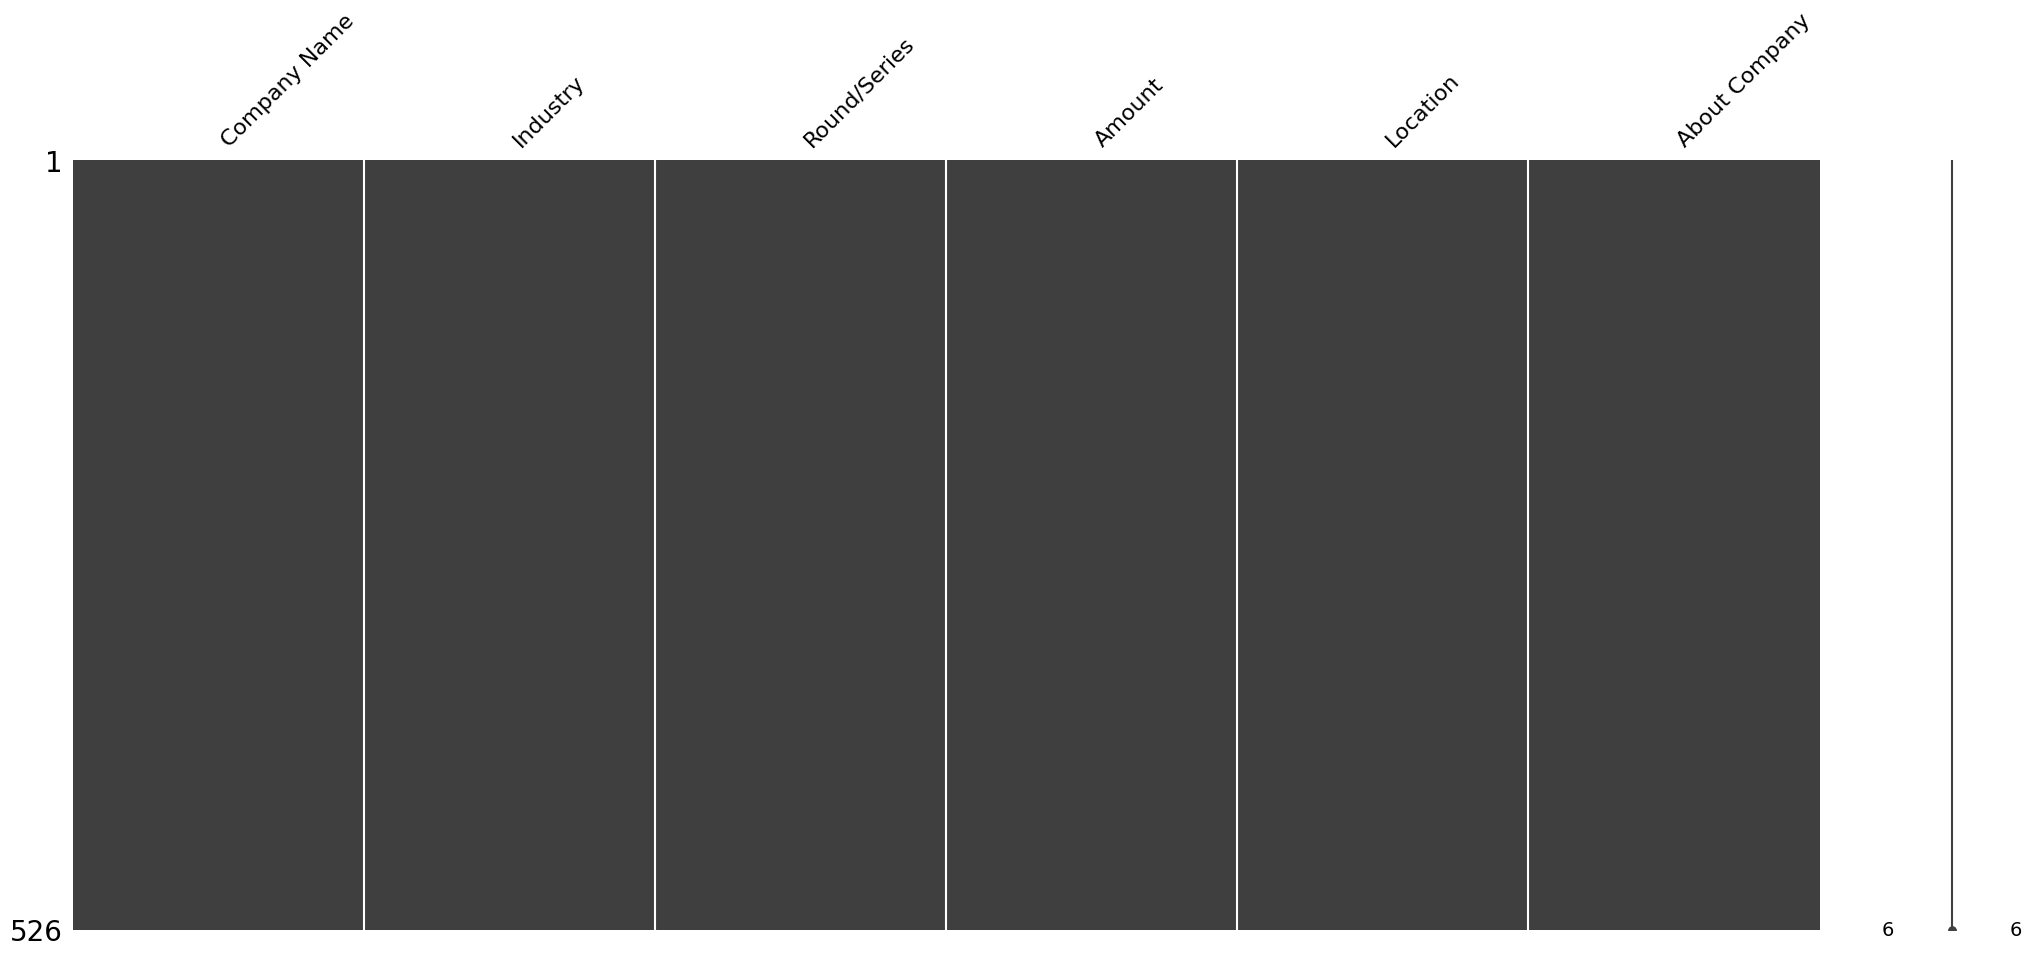

In [32]:
# Visualize it
msno.matrix(df_2018)

As indicated by the graph above, there are no missing values in the 2018 dataset

In [33]:
df_2019.isnull().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

<Axes: >

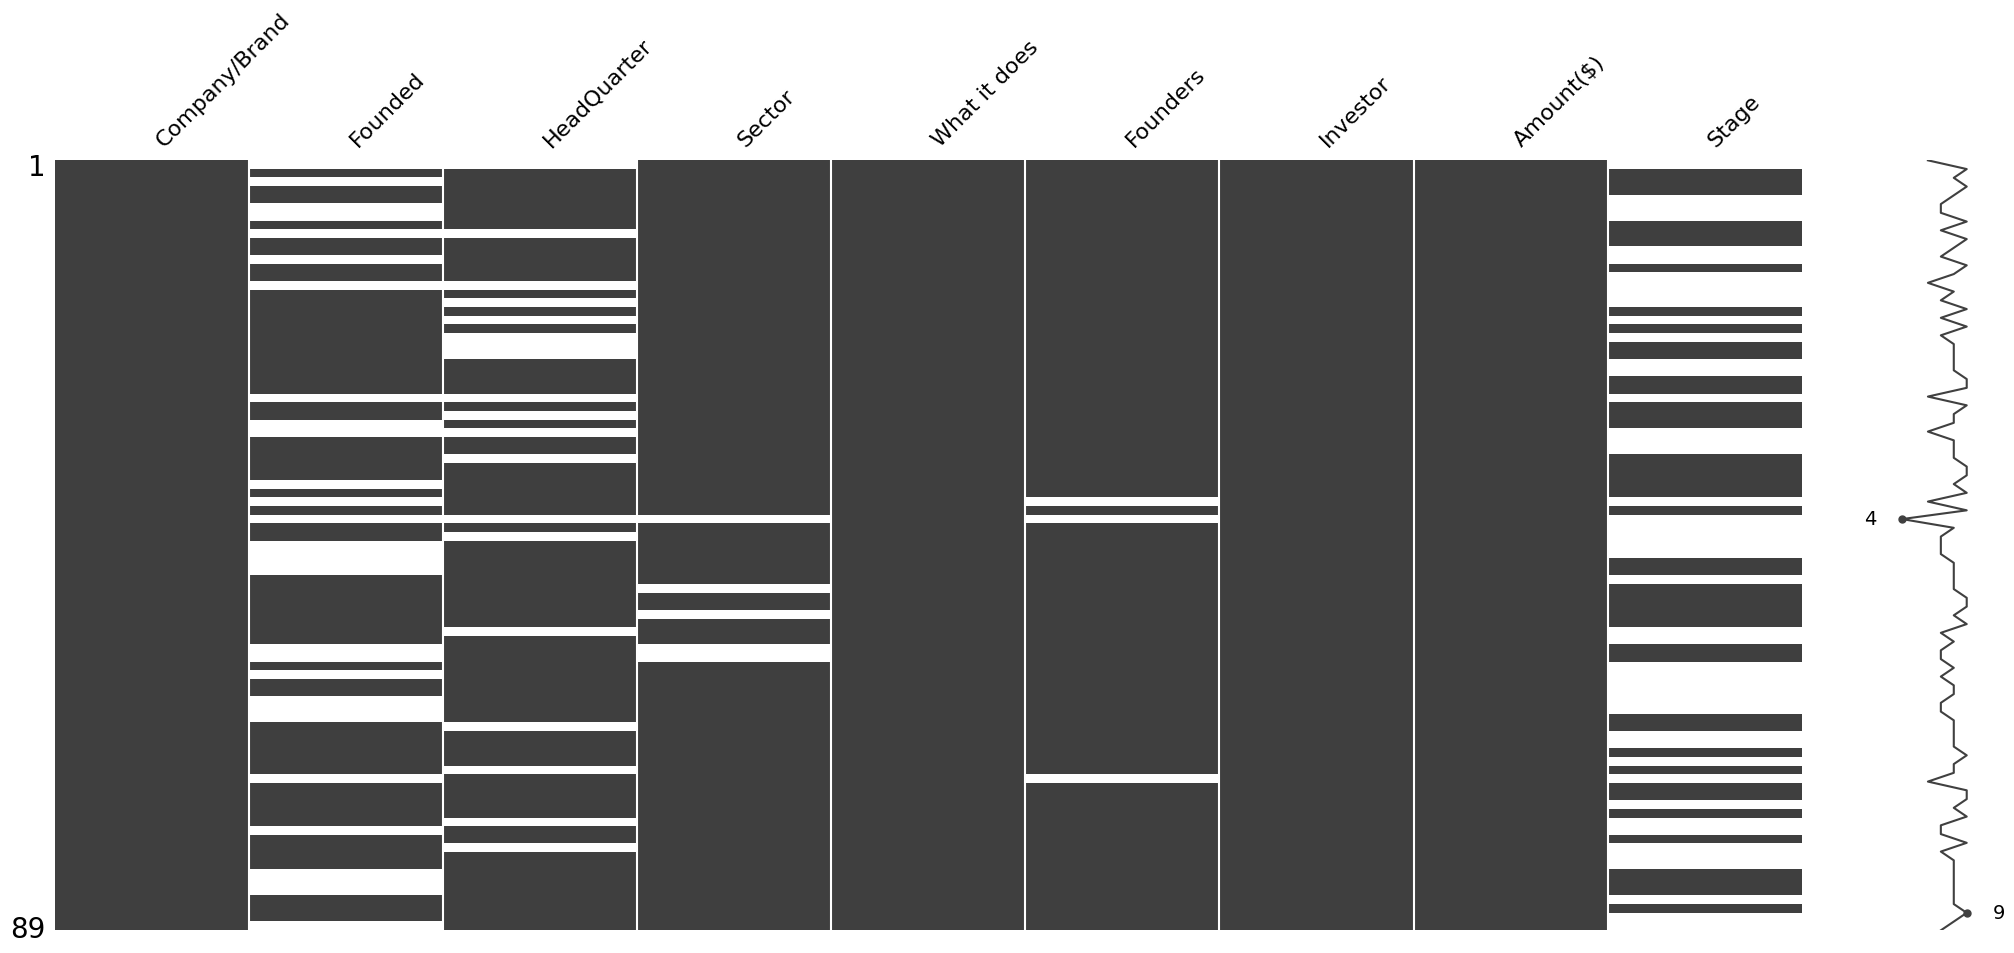

In [34]:
# Visualize it
msno.matrix(df_2019)

In [35]:
df_2020.isnull().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

<Axes: >

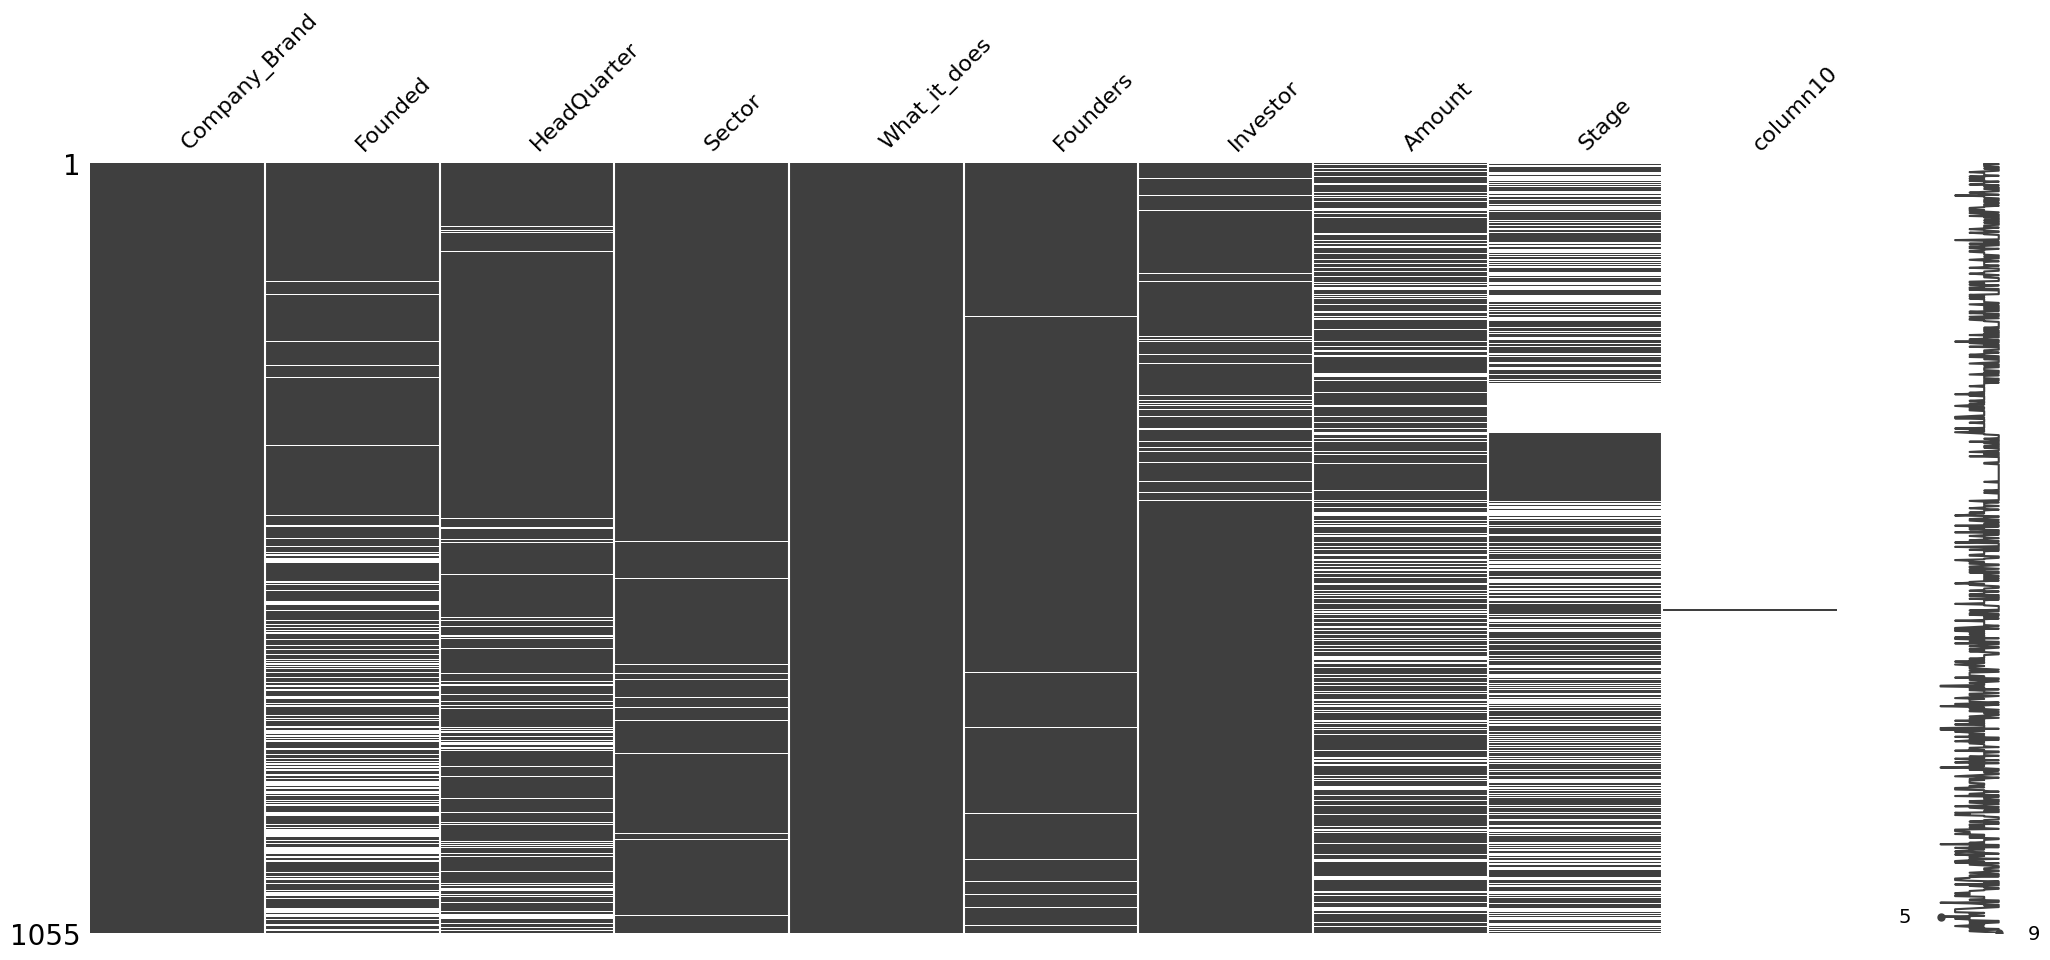

In [36]:
# Visualize it
msno.matrix(df_2020)

In [37]:
df_2021.isnull().sum()


Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

<Axes: >

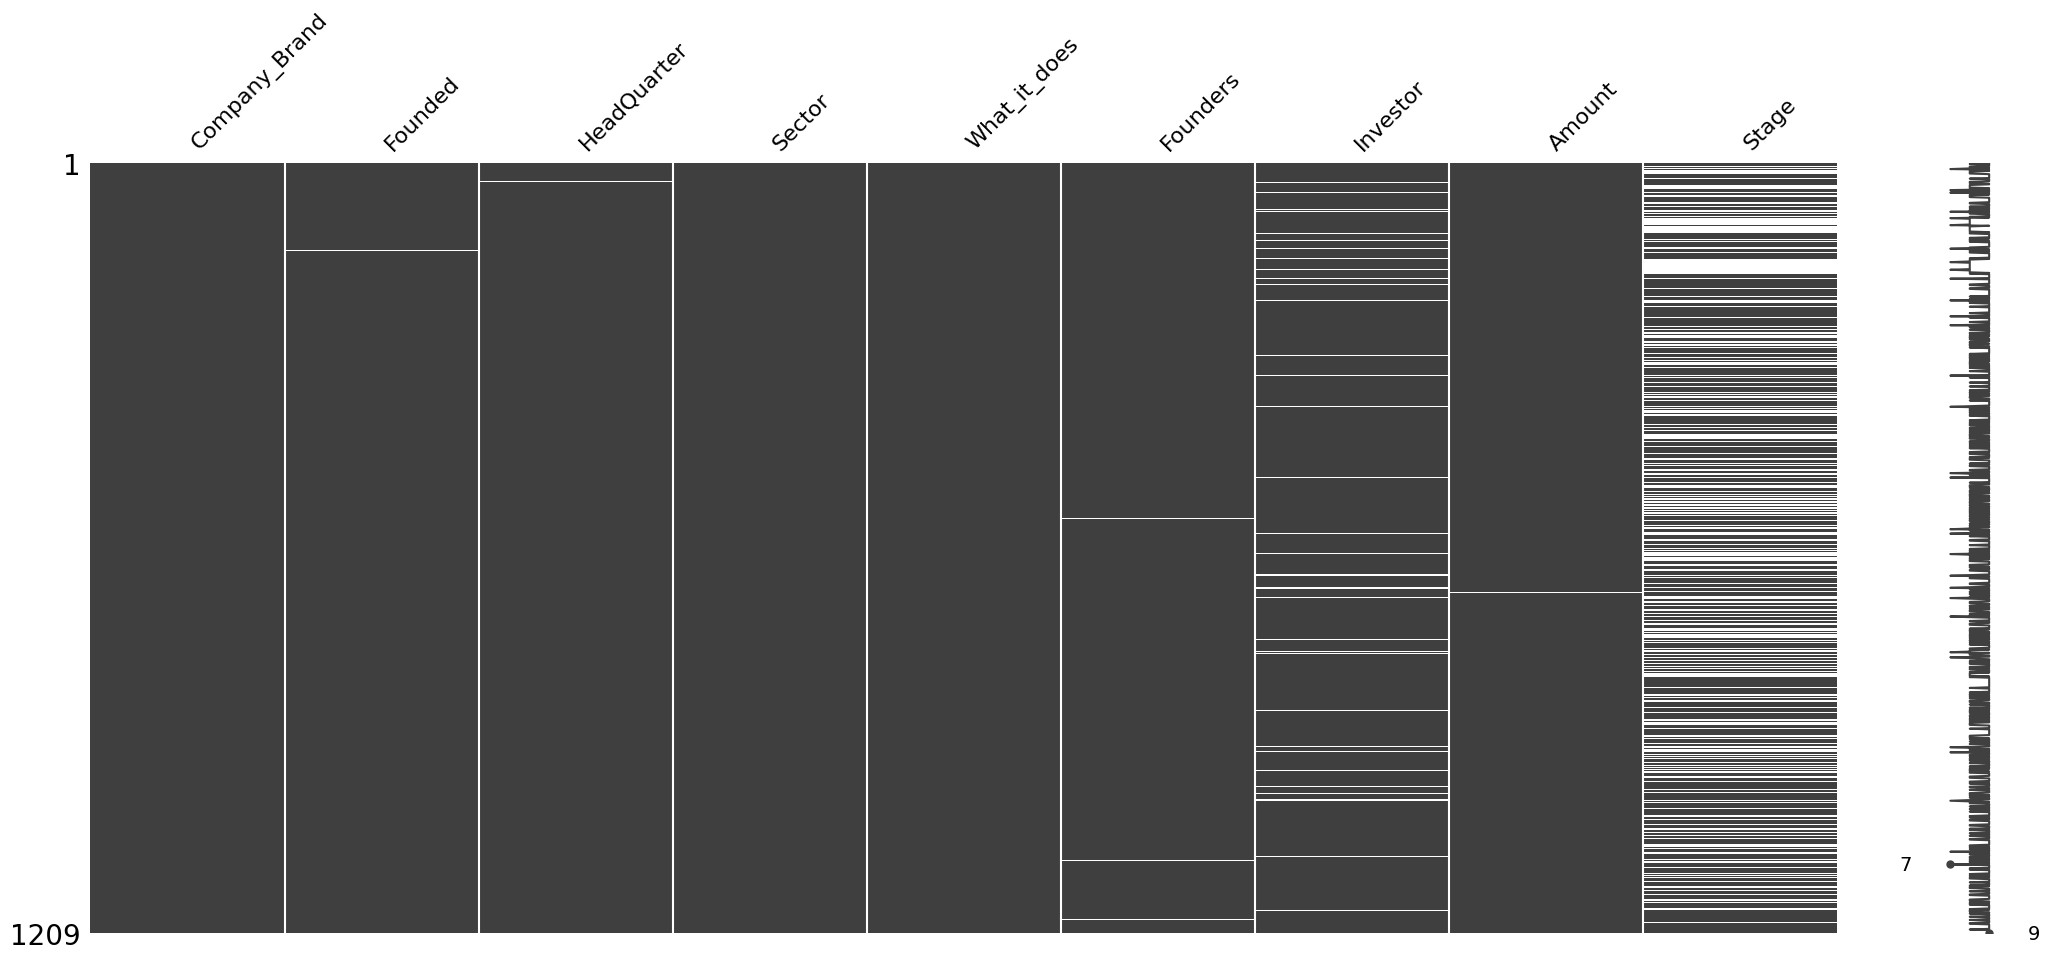

In [38]:
# Visualize it
msno.matrix(df_2021)

In [39]:
# Check for duplicates
df_2018.duplicated().sum()

1

In [40]:
df_2019.duplicated().sum()

0

In [41]:
df_2020.duplicated().sum()

3

In [42]:
df_2021.duplicated().sum()

19

For the duplicate analysis, dataset 2018 contains 1 duplicated data point, dataset 2019 contains 2 duplicates though the code above shows none, it will be explored further, dataset 2020 contains 3 and dataset 2021 contains 19.

All the duplicated rows will be explored and dropped in the data cleaning process

In [43]:
# Retrieve the duplicated rows in the 2018 dataset
df_2018[df_2018.duplicated()]

,Company Name,Industry,Round/Series,Amount,Location,About Company
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


In [44]:
# Retrieve the duplicated rows in the 2020 dataset
df_2020[df_2020.duplicated()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
145,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,None
205,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,None,None
362,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,None


In [45]:
# Retrieve the duplicated rows in the 2018 dataset
df_2021[df_2021.duplicated()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
107,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None
109,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
117,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None
119,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None
243,Trinkerr,2021.0,Bangalore,Capital Markets,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,$6600000,Series A
244,Zorro,2021.0,Gurugram,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",$32000000,Seed
245,Ultraviolette,2021.0,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",$150000000,Series C
246,NephroPlus,2009.0,Hyderabad,Hospital & Health Care,A vision and passion of redefining healthcare ...,Vikram Vuppala,IIFL Asset Management,$24000000,Series E
247,Unremot,2020.0,Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,$700000,Seed


## DATA ASSESSMENT

After the data was gathered from the various sources, the data was Visually and Programmatically assessed on Quality issues.


#### Data Quality Issues


I have identified several data quality issues while exploring the datasets:

1. Inconsistent and missing columns: Some datasets have inconsistent column structures, with missing columns in certain cases.

2. Missing columns and duplicates in the datasets: Specifically, the 2018 dataset is missing additional columns that are present in other datasets.

3. Inconsistent values and currencies in the Amount column: The Amount column contains inconsistent values and different currencies.

4. Inconsistent values in the Stage column: The Stage column exhibits inconsistent values across all datasets, which hampers uniform analysis.

5. Missing values: Some datasets contain missing values, which need to be addressed for a complete and reliable analysis.


# HYPOTHESIS


**Null Hypothesis (H0)**

The round of funding (Stage_of_funding) does not have a significant impact on the amount of funds raised (Amount) by Indian startups.

**Alternate Hypothesis (H1)**

The round of funding (Stage_of_funding) has a significant impact on the amount of funds raised (Amount) by Indian startups.


## ANALYTICAL QUESTIONS


1. How does the distribution of funding amounts vary across different stages of funding? Are there any outliers in the funding amount within each stage?

2. What has been the trend of investment amount over the years (2018–2021)?

3. What has accounted for the distribution of stages of funding in a year-by-year case?

4. What stage of startups received the highest funding investment and why?

5. Does the sector of startups have an influence on the stage of funding they receive and why?


# DATA CLEANING PROCESS


NOTE:

After conducting the hypothesis test, it was found that there is a significant difference in the funding amount received by startups at different stages of funding. 

To handle the missing values in the 'Amount' column, we decided to replace them with the median funding amount for each respective stage. This approach addresses outliers and provides a more accurate estimate of the funding amount a startup is likely to receive at a specific stage of funding.

 By using the median, we ensure that the replaced values align with the overall funding trends observed in each funding stage.

## 2018


In [46]:
# Check the uniqueness of the amount column
df_2018['Amount'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [47]:
# Get total unique values
df_2018['Amount'].nunique()

198

For rupee to USD conversion

**Average exchange rate in 2018 :** 68.4113 INR

**Source:** exchangerates.org.uk


In [48]:
# Define a function to clean the amount column

def clean_amount_column(): 
    # Create a copy of the 'Amount' column in df_2018 and remove commas
    amount_column = df_2018['Amount'].copy().str.replace(',', '')
    
    # Extract values in rupees (₹)
    amt_in_rupee = amount_column[amount_column.str.startswith('₹')]
    # Strip off the leading currency symbol in the Amount column
    amt_in_rupee = amt_in_rupee.str.lstrip('₹')
    # Convert the rupee amounts to USD using the conversion rate 1usd = 68.4113
    amt_in_rupee = amt_in_rupee.apply(lambda x: int(float(x) / 68.4113))
   
    # Extract values in dollars ($)
    amt_in_dollar = amount_column[amount_column.str.startswith('$')]
    # Remove the dollar sign
    amt_in_dollar = amt_in_dollar.str.lstrip('$')
        
    # Replace the uncleaned amount values with the cleaned rupee amounts
    amount_column.loc[amt_in_rupee.index] = amt_in_rupee
    # Replace the uncleaned amount values with the cleaned dollar amounts
    amount_column.loc[amt_in_dollar.index] = amt_in_dollar

    # Convert the amount column to numeric
    amount_column = pd.to_numeric(amount_column, errors='coerce')

    # Update the 'Amount' column in df_2018 with the cleaned amount values
    df_2018['Amount'] = amount_column



In [49]:
# Run the clean amount column function
clean_amount_column()

In [50]:
# Confirm changes
df_2018['Amount'].head(10)

0     250000.0
1     584698.0
2     950135.0
3    2000000.0
4          NaN
5    1600000.0
6     233879.0
7     730873.0
8          NaN
9          NaN
Name: Amount, dtype: float64

In [51]:
# Drop Duplicates rows
df_2018.drop_duplicates(inplace=True)

In [52]:
# Confirm changes
df_2018.duplicated().sum()

0

In [53]:
# create a new year (Founded) column for the 2018 dataset
df_2018['Founded'] = 2018

In [54]:
# Confirm changes
df_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,Founded
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584698.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,950135.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018


In [55]:
# Rename the columns to reflect the columns in the data dictionary
columns_to_rename = {
    'Company Name': 'Company/Brand',
    'Industry': 'Sector',
    'Round/Series': 'Stage',
    'About Company': 'What_it_does'
}

df_2018.rename(columns=columns_to_rename, inplace=True)

In [56]:
# Confirm changes
df_2018.head()

,Company/Brand,Sector,Stage,Amount,Location,What_it_does,Founded
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584698.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,950135.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018


In [57]:
df_2018['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [58]:
# Clean the Stage column categorize them

new_stage = {
    'Seed': 'Seed funding',
    'Angel': 'Seed funding',
    'Venture - Series Unknown': 'Series A',
    'Debt Financing': 'Series A',
    'Grant': 'Seed funding',
    'Pre-Seed': 'Pre-Seed funding',
    'Funding Round': 'Pre-Seed funding',
    'Fresh funding': 'Pre-Seed funding',
    'Pre series A': 'Series A',
    'Post series A': 'Series A',
    'Seed fund': 'Seed funding',
    'Series B+': 'Series B',
    'Seed round': 'Seed funding',
    'Pre-seed' : 'Pre-Seed funding',
    'Seed A': 'Seed funding',
    'Pre-series A' : 'Series A',
    'Pre-series' : 'Pre-Seed funding',
    'Pre-series C' : 'Series C', 
    'Pre-series B' : 'Series B',
    'Pre- series A' : 'Series A',
    'Pre-Series B' : 'Series B',
    'Series A-1' : 'Series A', 
    'Seies A': 'Series A',
    'Seed Funding' : 'Seed funding', 
    'Pre-Seed' : 'Pre-Seed funding', 
    'Seed round': 'Seed funding' ,
    'Pre-seed Round': 'Pre-Seed funding', 
    'Pre Series A' : 'Series A',
    'Pre seed Round': 'Pre-Seed funding', 
    'Angel Round' :  'Seed funding', 
    'Pre series A1': 'Series A',
    'Pre series A' : 'Series A', 
    'Seed Round' : 'Seed funding',
    'Pre seed round' : 'Pre-Seed funding',
    'Pre series B' : 'Series B', 
    'Pre series C' : 'Series B', 
    'Seed Investment': 'Seed funding',
    'Seed+' : 'Seed funding',
    'Series A+' : 'Series A',
    'PE' : 'Private Equity',
    'Pre-series A1' : 'Series A', 
    '$300000' : 'None', 
    'Early seed' : 'Pre-Seed funding',
    '$6000000' : 'None',
    '$1000000' : 'None',
    'Series B2' : 'Series B',
    'Series E2' : 'Series E', 
    'Series D1' : 'Series D',
    'Series B3' : 'Series B',
    'Series F1' : 'Series F',
    'Series A2' : 'Series A',
    '$1200000': 'None',
    'Series F2':'Series F'
}

In [59]:
# Replace with the new stages
df_2018.replace({'Stage': new_stage}, inplace=True)

In [60]:
# Confirm changes
df_2018['Stage'].unique()

array(['Seed funding', 'Series A', 'Series B', 'Pre-Seed funding',
       'Private Equity', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance'], dtype=object)

In [61]:
# Replace the web address with NaN
df_2018['Stage'].replace('https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593', np.NaN, inplace=True)

In [62]:
# Confirm changes
df_2018['Stage'].value_counts()

Stage
Seed funding             320
Series A                 123
Series B                  20
Series C                  16
Private Equity            10
Corporate Round            8
Pre-Seed funding           7
Series E                   5
Series D                   3
Secondary Market           3
Post-IPO Equity            3
Post-IPO Debt              2
Undisclosed                2
Series H                   1
Non-equity Assistance      1
Name: count, dtype: int64

In [63]:
# Check for missing values in the stage column
df_2018['Stage'].isnull().sum()

1

In [64]:
# Write a function that fills the missing stage with most frequent 
def fill_missing_stages_with_most_frequent(df):
  """
  This function fills the missing values in the Stage column with the most frequent stage category.

  Args:
    df: The DataFrame containing the Stage column.

  Returns:
    Nothing
  """

  imputer = SimpleImputer(strategy="most_frequent")

  # Impute the missing value in the Stage column
  df['Stage'] = imputer.fit_transform(df["Stage"].to_numpy().reshape(-1, 1)).reshape(1, -1)[0]

  #Confirm changes
  print(df["Stage"].isnull().sum())

In [65]:
# Execute the function to replace NaNs
fill_missing_stages_with_most_frequent(df_2018)

0


In [66]:
# Write a function that fills the missing values in the Amount column using the median for each stage

def fill_missing_amounts_with_median(df):
  """
  This function fills the missing values in the Amount column using the median for each stage.

  Args:
    df: The DataFrame containing the Stage and Amount columns.

  Returns:
    Nothing. The function modifies the DataFrame in place.
  """
  # Create a dictionary to store the median for each stage
  median = {}
  
  for stage in df['Stage'].unique():
    stage_data = df[df['Stage'] == stage]
    if len(stage_data) > 0:
      median[stage] = stage_data['Amount'].median()
    
    # Fill the missing values in the Amount column with the median of it corresponding stage
    df.loc[(df['Stage'] == stage) & (df['Amount'].isnull()), 'Amount'] = median[stage]
 
    # Print the stage and it corresponding number of missing values in the amount column  
    num_missing_amounts = len(df.loc[(df['Stage'] == stage) & (df['Amount'].isnull())]['Amount'])
    
    # Confirm changes
    print( stage, '--->', num_missing_amounts, '---->', median[stage])

In [67]:
# Execute the function to replace NaNs
fill_missing_amounts_with_median(df_2018)

Seed funding ---> 0 ----> 584698.0
Series A ---> 0 ----> 3700000.0
Series B ---> 0 ----> 11000000.0
Pre-Seed funding ---> 0 ----> 100000.0
Private Equity ---> 0 ----> 167124681.5
Post-IPO Debt ---> 0 ----> 29617468.0
Series H ---> 0 ----> 1000000000.0
Series C ---> 0 ----> 35000000.0
Series E ---> 0 ----> 30000000.0
Corporate Round ---> 0 ----> 3800541.0
Undisclosed ---> 0 ----> 9500.5
Series D ---> 0 ----> 50000000.0
Secondary Market ---> 0 ----> 113258869.5
Post-IPO Equity ---> 0 ----> 185000000.0
Non-equity Assistance ---> 0 ----> 40000.0


## 2019


In [68]:
# clean the stage column
df_2019['Stage'].unique()

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

In [69]:
# Replace with new stages
df_2019.replace({'Stage': new_stage}, inplace=True)

In [70]:
# Replace nan with the most frequent
fill_missing_stages_with_most_frequent(df_2019)

0


In [71]:
# Confirm changes
df_2019['Stage'].unique()

array(['Series A', 'Series C', 'Pre-Seed funding', 'Series D', 'Series G',
       'Series B', 'Seed funding', 'Series E', 'Series F'], dtype=object)

In [72]:
# Get all columns of the dataset
df_2019.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [73]:
# Rename Amount($) to Amount for data consistency
df_2019.rename(columns={'Amount($)': 'Amount', 'What it does': 'What_it_does'}, inplace=True)

In [74]:
# Clean the amount column
df_2019['Amount'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [75]:
# Strip off the dollar($) sign and remove all commas and convert to int
df_2019['Amount'] =  df_2019['Amount'].str.lstrip('$').str.replace(',', '')

In [76]:
# Check for number of observations with Amount as Undisclosed
len(df_2019['Amount'] == 'Undisclosed')

89

In [77]:
# Convert the Amount to numeric and replace Undisclosed with NaN
df_2019['Amount'] = pd.to_numeric(df_2019['Amount'], errors='coerce')

In [78]:
# Execute the function to replace NaNs
fill_missing_amounts_with_median(df_2019)

Series A ---> 0 ----> 5500000.0
Series C ---> 0 ----> 30000000.0
Pre-Seed funding ---> 0 ----> 28000000.0
Series D ---> 0 ----> 45000000.0
Series G ---> 0 ----> 275000000.0
Series B ---> 0 ----> 15000000.0
Seed funding ---> 0 ----> 2500000.0
Series E ---> 0 ----> 30000000.0
Series F ---> 0 ----> 20000000.0


In [79]:
# Clean the Founded column
df_2019['Founded'].unique()

array([  nan, 2014., 2004., 2013., 2010., 2018., 2019., 2017., 2011.,
       2015., 2016., 2012., 2008.])

In [80]:
# Replace nan with NaN and convert it to numeric
df_2019['Founded'] = pd.to_numeric(df_2019['Founded'], errors='coerce').astype('Int64')

In [81]:
# Confirm changes
df_2019['Founded'].unique()

<IntegerArray>
[<NA>, 2014, 2004, 2013, 2010, 2018, 2019, 2017, 2011, 2015, 2016, 2012, 2008]
Length: 13, dtype: Int64

In [82]:
# Check the duplicates 
df_2019[(df_2019['Company/Brand'] == 'Kratikal') | (df_2019['Company/Brand'] == 'Licious')]

,Company/Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
7,Kratikal,2013,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.",1000000.0,Series A
30,Licious,<NA>,Bangalore,Food,Online meat shop,"Vivek Gupta, Abhay Hanjura",Vertex Growth Fund,30000000.0,Series E
68,Licious,2015,Bangalore,Food,Online meat shop,"Vivek Gupta, Abhay Hanjura",Vertex Ventures,25000000.0,Series D
82,Kratikal,<NA>,Uttar pradesh,Technology,Provides cyber security solutions,Pavan Kushwaha,"Gilda VC, Art Venture, Rajeev Chitrabhanu",1000000.0,Series A


In [83]:
# For data accuracy drop index 30 and 82
df_2019.drop(index=[30, 82], inplace=True)

In [84]:
# Confirm changes
df_2019[(df_2019['Company/Brand'] == 'Kratikal') | (df_2019['Company/Brand'] == 'Licious')]

,Company/Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
7,Kratikal,2013,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.",1000000.0,Series A
68,Licious,2015,Bangalore,Food,Online meat shop,"Vivek Gupta, Abhay Hanjura",Vertex Ventures,25000000.0,Series D


In [85]:
# Reset Index
df_2019.reset_index(inplace=True)

In [86]:
# Check missing values
df_2019.isnull().sum()

index             0
Company/Brand     0
Founded          27
HeadQuarter      19
Sector            5
What_it_does      0
Founders          3
Investor          0
Amount            0
Stage             0
dtype: int64

<Axes: >

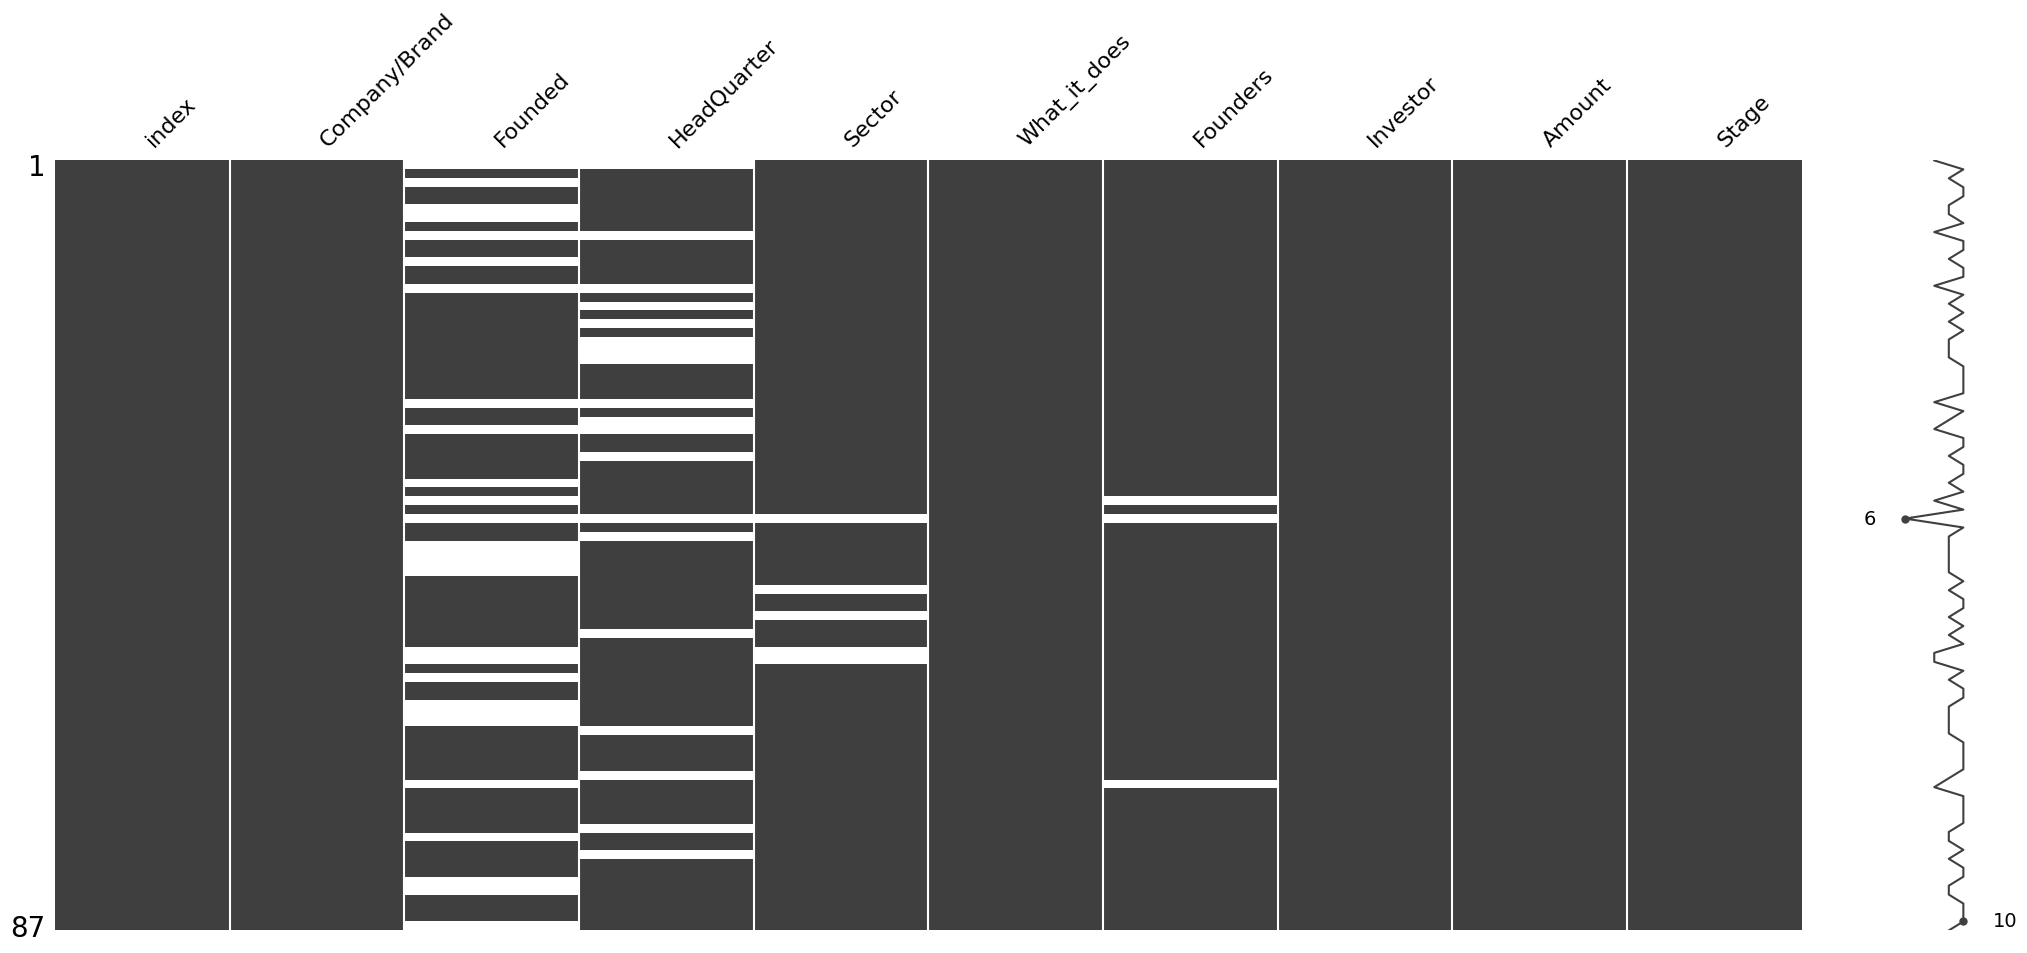

In [87]:
# Visualize missing values
msno.matrix(df_2019)

## 2020


In [88]:
# Confirm changes
df_2020.duplicated().sum()

3

In [89]:
# Confirm changes
df_2020.duplicated().sum()

3

In [90]:
# Drop the column10 since it is unnecessary
df_2020.drop('column10', axis=1, inplace=True)

In [91]:
# Clean the stage column
df_2020['Stage'].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

In [92]:
# Replace all None values with NaN
df_2020['Stage'] = df_2020['Stage'].fillna(value=np.nan)

In [93]:
# Assign new stages to correct all inconsistencies
df_2020['Stage'] = df_2020.replace({'Stage': new_stage})['Stage']

In [94]:
# Replace all NaNs with the frequent category
fill_missing_stages_with_most_frequent(df_2020)

0


In [95]:
# Confirm changes
df_2020['Stage'].unique()

array(['Series A', 'Pre-Seed funding', 'Seed funding', 'Series C',
       'Series B', 'Debt', 'Series E', 'Bridge', 'Series D', 'Series F',
       'Edge', 'Series H', 'Seed Round & Series A', 'Bridge Round',
       'Mid series', 'Series C, D'], dtype=object)

In [96]:
# Rename columns
df_2020.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [97]:
# Rename the company name and the amount column for consistency
df_2020.rename(columns={'Company_Brand': 'Company/Brand'}, inplace=True)

In [98]:
# Confirm changes
df_2020.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [99]:
# Clean the amount column i.e convert to numeric
df_2020['Amount'] = pd.to_numeric(df_2020['Amount'], errors='coerce')

In [100]:
# Execute the function to replace NaNs
fill_missing_amounts_with_median(df_2020)

Series A ---> 0 ----> 3000000.0
Pre-Seed funding ---> 0 ----> 270000.0
Seed funding ---> 0 ----> 982530.0
Series C ---> 0 ----> 24000000.0
Series B ---> 0 ----> 10250000.0
Debt ---> 0 ----> 5000000.0
Series E ---> 0 ----> 28000000.0
Bridge ---> 0 ----> 1500000.0
Series D ---> 0 ----> 30000000.0
Series F ---> 0 ----> 22400000.0
Edge ---> 0 ----> 5040000.0
Series H ---> 0 ----> 42500000.0
Seed Round & Series A ---> 0 ----> 2800000.0
Bridge Round ---> 1 ----> nan
Mid series ---> 0 ----> 500000.0
Series C, D ---> 1 ----> nan


In [101]:
# Convert the Founded (Year) to numeric
df_2020['Founded'] = pd.to_numeric(df_2020['Founded'], errors='coerce')

<Axes: >

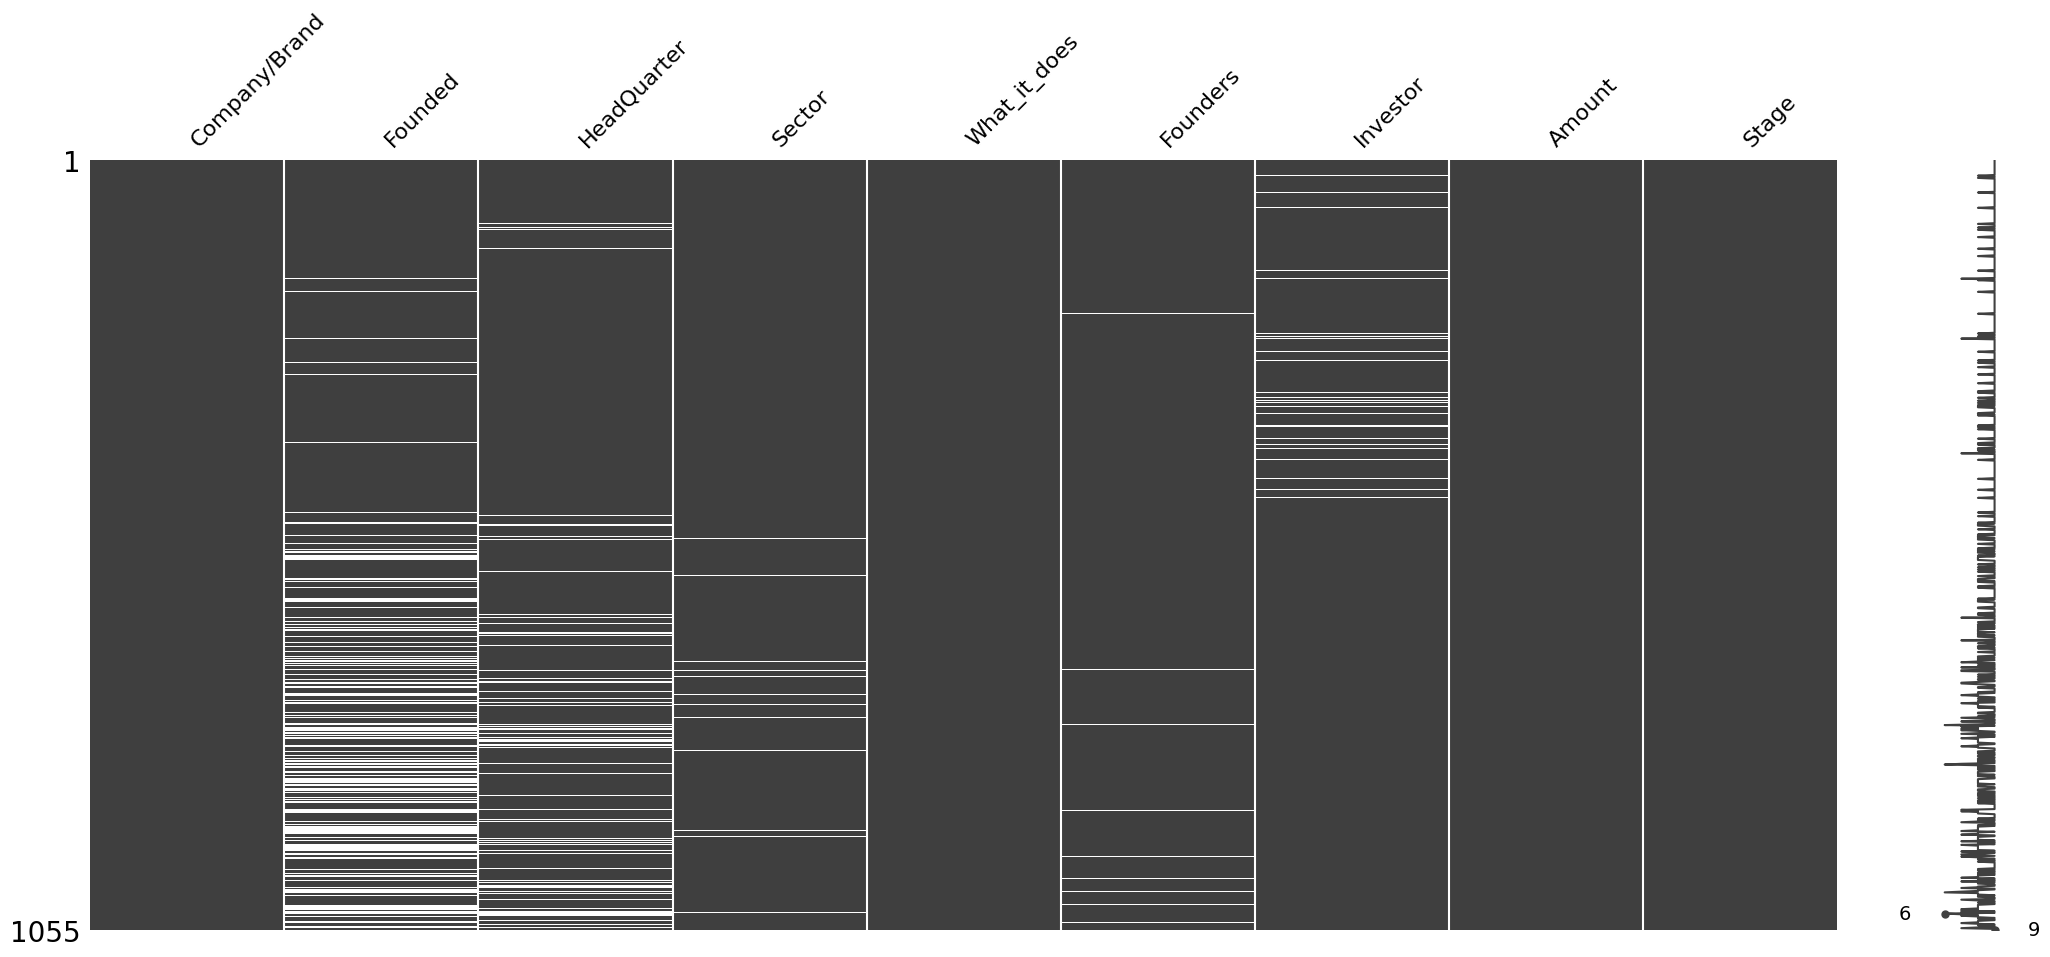

In [102]:
# Visualize missing values
msno.matrix(df_2020)

## 2021


In [103]:
# Clean the stage column
df_2021['Stage'].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       '$1200000', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

In [104]:
# Replace the stage column with new stages
df_2021.replace({'Stage': new_stage}, inplace=True)

In [105]:
# Replace all None values with NaN
df_2021['Stage'] = df_2021['Stage'].fillna(value=np.nan)

In [106]:
# Fill all the NaN in the stages with the most frequent
fill_missing_stages_with_most_frequent(df_2021)

0


In [107]:
# Confirm changes
df_2021['Stage'].unique()

array(['Series A', 'Series D', 'Series C', 'Seed funding', 'Series B',
       'Series E', 'Pre-Seed funding', 'Debt', 'None', 'Bridge',
       'Series F', 'Series G', 'Series H', 'Private Equity', 'Series I'],
      dtype=object)

In [108]:
# Rename columns
df_2021.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [109]:
# Rename the company name and the amount column for consistency
df_2021.rename(columns={'Company_Brand': 'Company/Brand'}, inplace=True)

In [110]:
# Confirm changes
df_2021.columns


Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [111]:
# Clean the amount column
df_2021['Amount'].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [112]:
# Strip off the $ and remove all commas
df_2021['Amount'] = df_2021['Amount'].str.lstrip('$').str.replace(',', '')

In [113]:
# Confirm changes
df_2021['Amount'].unique()

array(['1200000', '120000000', '30000000', '51000000', '2000000',
       '188000000', '200000', 'Undisclosed', '1000000', '3000000',
       '100000', '700000', '9000000', '40000000', '49000000', '400000',
       '300000', '25000000', '160000000', '150000', '1800000', '5000000',
       '850000', '53000000', '500000', '1100000', '6000000', '800000',
       '10000000', '21000000', '7500000', '26000000', '7400000',
       '1500000', '600000', '800000000', '17000000', '3500000',
       '15000000', '215000000', '2500000', '350000000', '5500000',
       '83000000', '110000000', '500000000', '65000000', '150000000000',
       '300000000', '2200000', '35000000', '140000000', '4000000',
       '13000000', None, '9500000', '8000000', 'Upsparks', '12000000',
       '1700000', '150000000', '100000000', '225000000', '6700000',
       '1300000', '20000000', '250000', '52000000', '3800000', '17500000',
       '42000000', '2300000', '7000000', '450000000', '28000000',
       '8500000', '37000000', '370

Incorrect amount identified ('Undisclosed', 'undisclosed', 'Series C', 'Seed', Upsparks', '', None)

For consistency, the Amount will be converted to numeric and errors coerce to NaN

In [114]:
df_2021['Amount'] = pd.to_numeric(df_2021['Amount'], errors='coerce')

In [115]:
# Confirm changes
df_2021['Amount'].unique()

array([1.20e+06, 1.20e+08, 3.00e+07, 5.10e+07, 2.00e+06, 1.88e+08,
       2.00e+05,      nan, 1.00e+06, 3.00e+06, 1.00e+05, 7.00e+05,
       9.00e+06, 4.00e+07, 4.90e+07, 4.00e+05, 3.00e+05, 2.50e+07,
       1.60e+08, 1.50e+05, 1.80e+06, 5.00e+06, 8.50e+05, 5.30e+07,
       5.00e+05, 1.10e+06, 6.00e+06, 8.00e+05, 1.00e+07, 2.10e+07,
       7.50e+06, 2.60e+07, 7.40e+06, 1.50e+06, 6.00e+05, 8.00e+08,
       1.70e+07, 3.50e+06, 1.50e+07, 2.15e+08, 2.50e+06, 3.50e+08,
       5.50e+06, 8.30e+07, 1.10e+08, 5.00e+08, 6.50e+07, 1.50e+11,
       3.00e+08, 2.20e+06, 3.50e+07, 1.40e+08, 4.00e+06, 1.30e+07,
       9.50e+06, 8.00e+06, 1.20e+07, 1.70e+06, 1.50e+08, 1.00e+08,
       2.25e+08, 6.70e+06, 1.30e+06, 2.00e+07, 2.50e+05, 5.20e+07,
       3.80e+06, 1.75e+07, 4.20e+07, 2.30e+06, 7.00e+06, 4.50e+08,
       2.80e+07, 8.50e+06, 3.70e+07, 3.70e+08, 1.60e+07, 4.40e+07,
       7.70e+05, 1.25e+08, 5.00e+07, 4.90e+06, 1.45e+08, 2.20e+07,
       7.00e+07, 6.60e+06, 3.20e+07, 2.40e+07, 7.25e+05, 4.61e

In [116]:
# Replace them with the median for each category
fill_missing_amounts_with_median(df_2021)

Series A ---> 0 ----> 4000000.0
Series D ---> 0 ----> 91500000.0
Series C ---> 0 ----> 50000000.0
Seed funding ---> 0 ----> 1000000.0
Series B ---> 0 ----> 20000000.0
Series E ---> 0 ----> 100000000.0
Pre-Seed funding ---> 0 ----> 350000.0
Debt ---> 0 ----> 6000000.0
None ---> 6 ----> nan
Bridge ---> 0 ----> 500000.0
Series F ---> 0 ----> 183500000.0
Series G ---> 0 ----> 159000000.0
Series H ---> 0 ----> 635000000.0
Private Equity ---> 0 ----> 100000000.0
Series I ---> 0 ----> 76000000.0


In [117]:
# Check for duplicates
df_2021.duplicated().sum()

25

In [118]:
# Drop all duplicates
df_2021.drop_duplicates(inplace=True)

In [119]:
# Confirm changes
df_2021.duplicated().sum()

0

<Axes: >

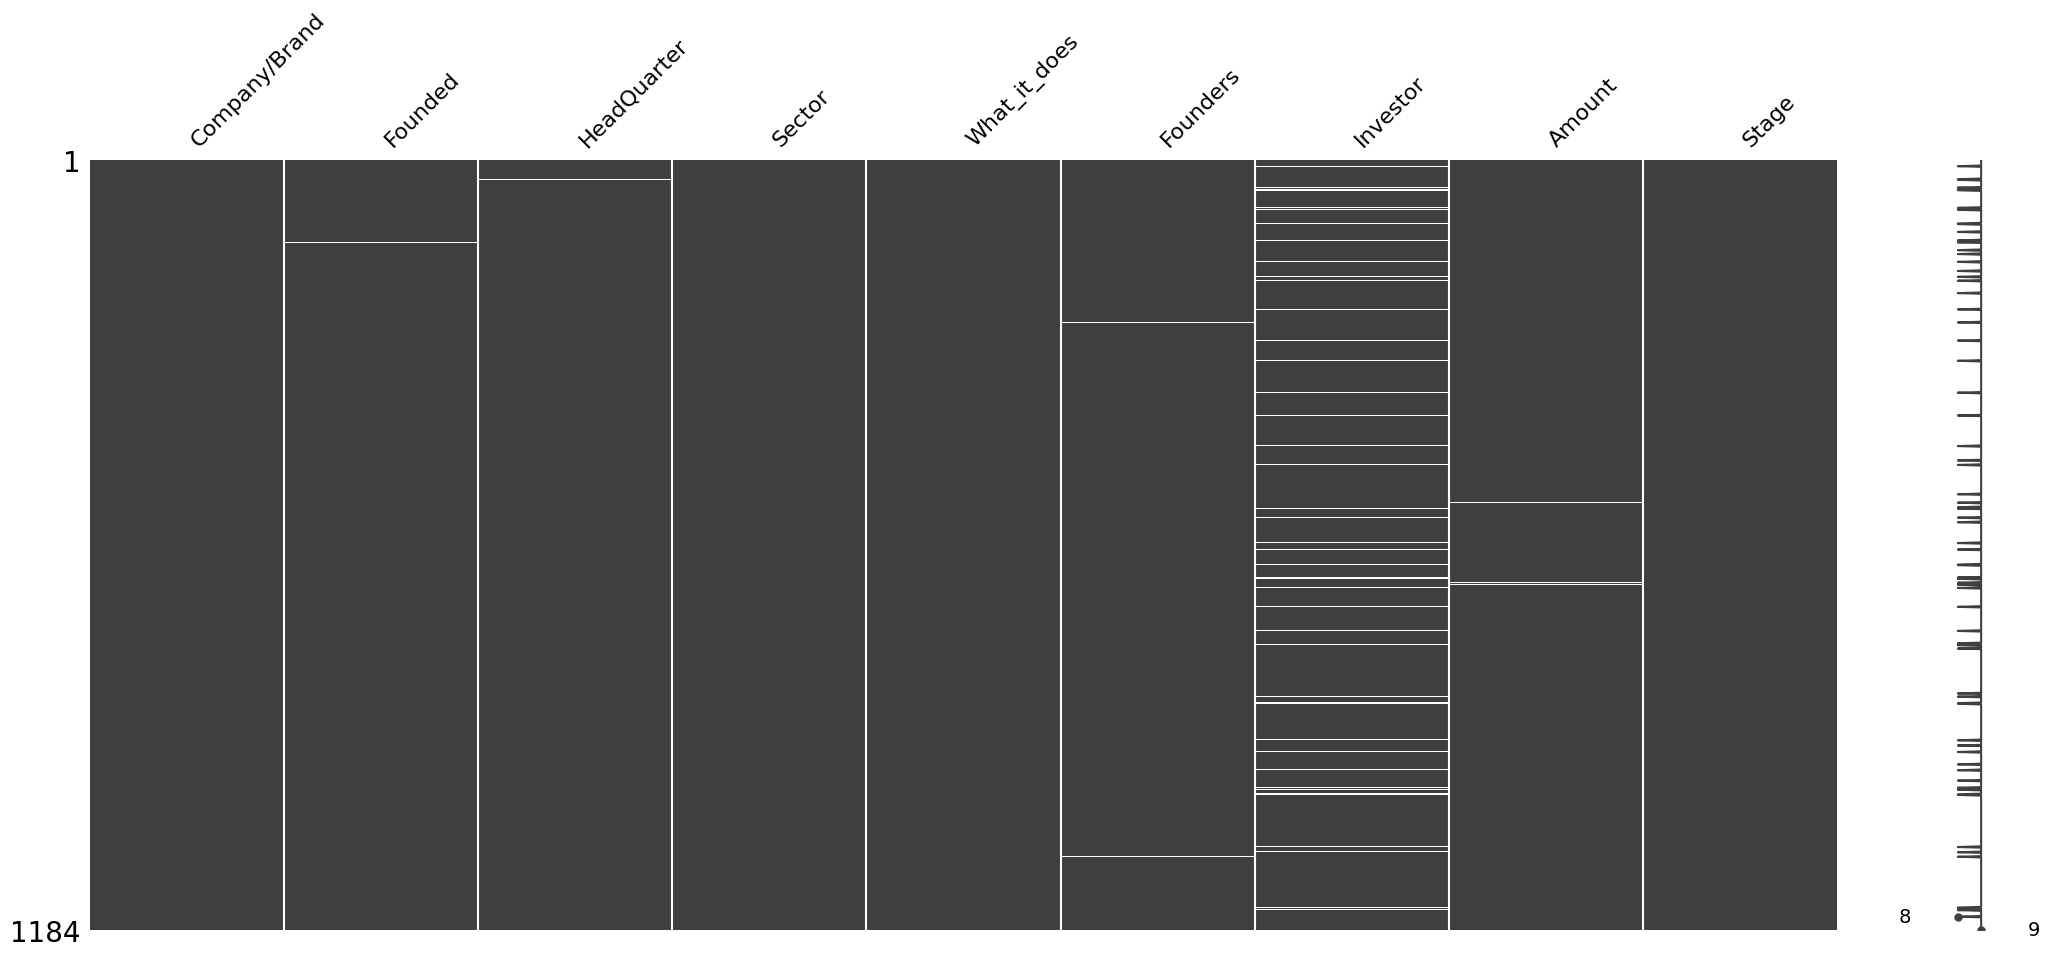

In [120]:
# Visualize missing values
msno.matrix(df_2021)

## DATA MERGING PROCESS


In [121]:
# Check all columns and drop unnecessary ones
df_2018.columns, df_2019.columns, df_2020.columns, df_2021.columns

(Index(['Company/Brand', 'Sector', 'Stage', 'Amount', 'Location',
        'What_it_does', 'Founded'],
       dtype='object'),
 Index(['index', 'Company/Brand', 'Founded', 'HeadQuarter', 'Sector',
        'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage'],
       dtype='object'),
 Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
        'Founders', 'Investor', 'Amount', 'Stage'],
       dtype='object'),
 Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
        'Founders', 'Investor', 'Amount', 'Stage'],
       dtype='object'))

##### Observations

- The `Location` column in the 2018 dataset will be dropped since it does not impact our analysis.
- The `Index` column in the 2019 dataset will also be dropped.
- The `HeadQuarter`, `Founders`, and `Investors` columns will be dropped as our analysis or hypothesis does not involve analyzing those columns.

In [122]:
# Drop columns
df_2018.drop('Location', axis=1, inplace=True)
df_2019.drop(columns=['index','HeadQuarter', 'Founders', 'Investor' ], inplace=True)
df_2020.drop(columns=['HeadQuarter', 'Founders', 'Investor' ], inplace=True)
df_2021.drop(columns=['HeadQuarter', 'Founders', 'Investor' ], inplace=True)


In [123]:
# Confirm changes
df_2018.columns, df_2019.columns, df_2020.columns, df_2021.columns

(Index(['Company/Brand', 'Sector', 'Stage', 'Amount', 'What_it_does',
        'Founded'],
       dtype='object'),
 Index(['Company/Brand', 'Founded', 'Sector', 'What_it_does', 'Amount',
        'Stage'],
       dtype='object'),
 Index(['Company/Brand', 'Founded', 'Sector', 'What_it_does', 'Amount',
        'Stage'],
       dtype='object'),
 Index(['Company/Brand', 'Founded', 'Sector', 'What_it_does', 'Amount',
        'Stage'],
       dtype='object'))

In [124]:
# Concatenate all 4 dataset and save to it a master_df variable
master_df = pd.concat([df_2018, df_2019, df_2020, df_2021], ignore_index=True)

In [125]:
master_df

,Company/Brand,Sector,Stage,Amount,What_it_does,Founded
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed funding,250000.0,"TheCollegeFever is a hub for fun, fiesta and f...",2018.0
1,Happy Cow Dairy,"Agriculture, Farming",Seed funding,584698.0,A startup which aggregates milk from dairy far...,2018.0
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,950135.0,Leading Online Loans Marketplace in India,2018.0
3,PayMe India,"Financial Services, FinTech",Seed funding,2000000.0,PayMe India is an innovative FinTech organizat...,2018.0
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed funding,584698.0,Eunimart is a one stop solution for merchants ...,2018.0
...,...,...,...,...,...,...
2846,Gigforce,Staffing & Recruiting,Series A,3000000.0,A gig/on-demand staffing company.,2019.0
2847,Vahdam,Food & Beverages,Series D,20000000.0,VAHDAM is among the world’s first vertically i...,2015.0
2848,Leap Finance,Financial Services,Series C,55000000.0,International education loans for high potenti...,2019.0
2849,CollegeDekho,EdTech,Series B,26000000.0,"Collegedekho.com is Student’s Partner, Friend ...",2015.0


In [126]:
# Check for duplicates after merging
master_df.duplicated().sum()

9

This above code reveals that the merged dataset contains 9 duplicated data points, These rows will be examined further and dropped

In [127]:
master_df[master_df.duplicated()]

,Company/Brand,Sector,Stage,Amount,What_it_does,Founded
721,Credgenics,FinTech,Series A,3000000.0,Credgenics is a tech-enabled platform backed b...,2018.0
757,Krimanshi,Biotechnology company,Seed funding,600000.0,Krimanshi aims to increase rural income by imp...,2015.0
817,Nykaa,Cosmetics,Series A,3000000.0,Nykaa is an online marketplace for different b...,2012.0
845,Genius Teacher,Edtech,Series A,2000000.0,Genius Teacher creates engaging educational co...,2016.0
974,Byju’s,EdTech,Series A,500000000.0,An Indian educational technology and online tu...,2011.0
1351,Medlife,Pharmaceutical,Series A,15500000.0,It solves inadequacies in the healthcare deliv...,2014.0
1355,Sarva,Yoga & wellness,Series A,3000000.0,It drives a cultural change in making yoga-bas...,<NA>
1647,Byju,Edtech,Series A,200000000.0,Provides online learning classes,2011.0
2058,Siply,FinTech,Seed funding,1000000.0,Siply Services operates as a micro-savings pla...,2020.0


<Axes: >

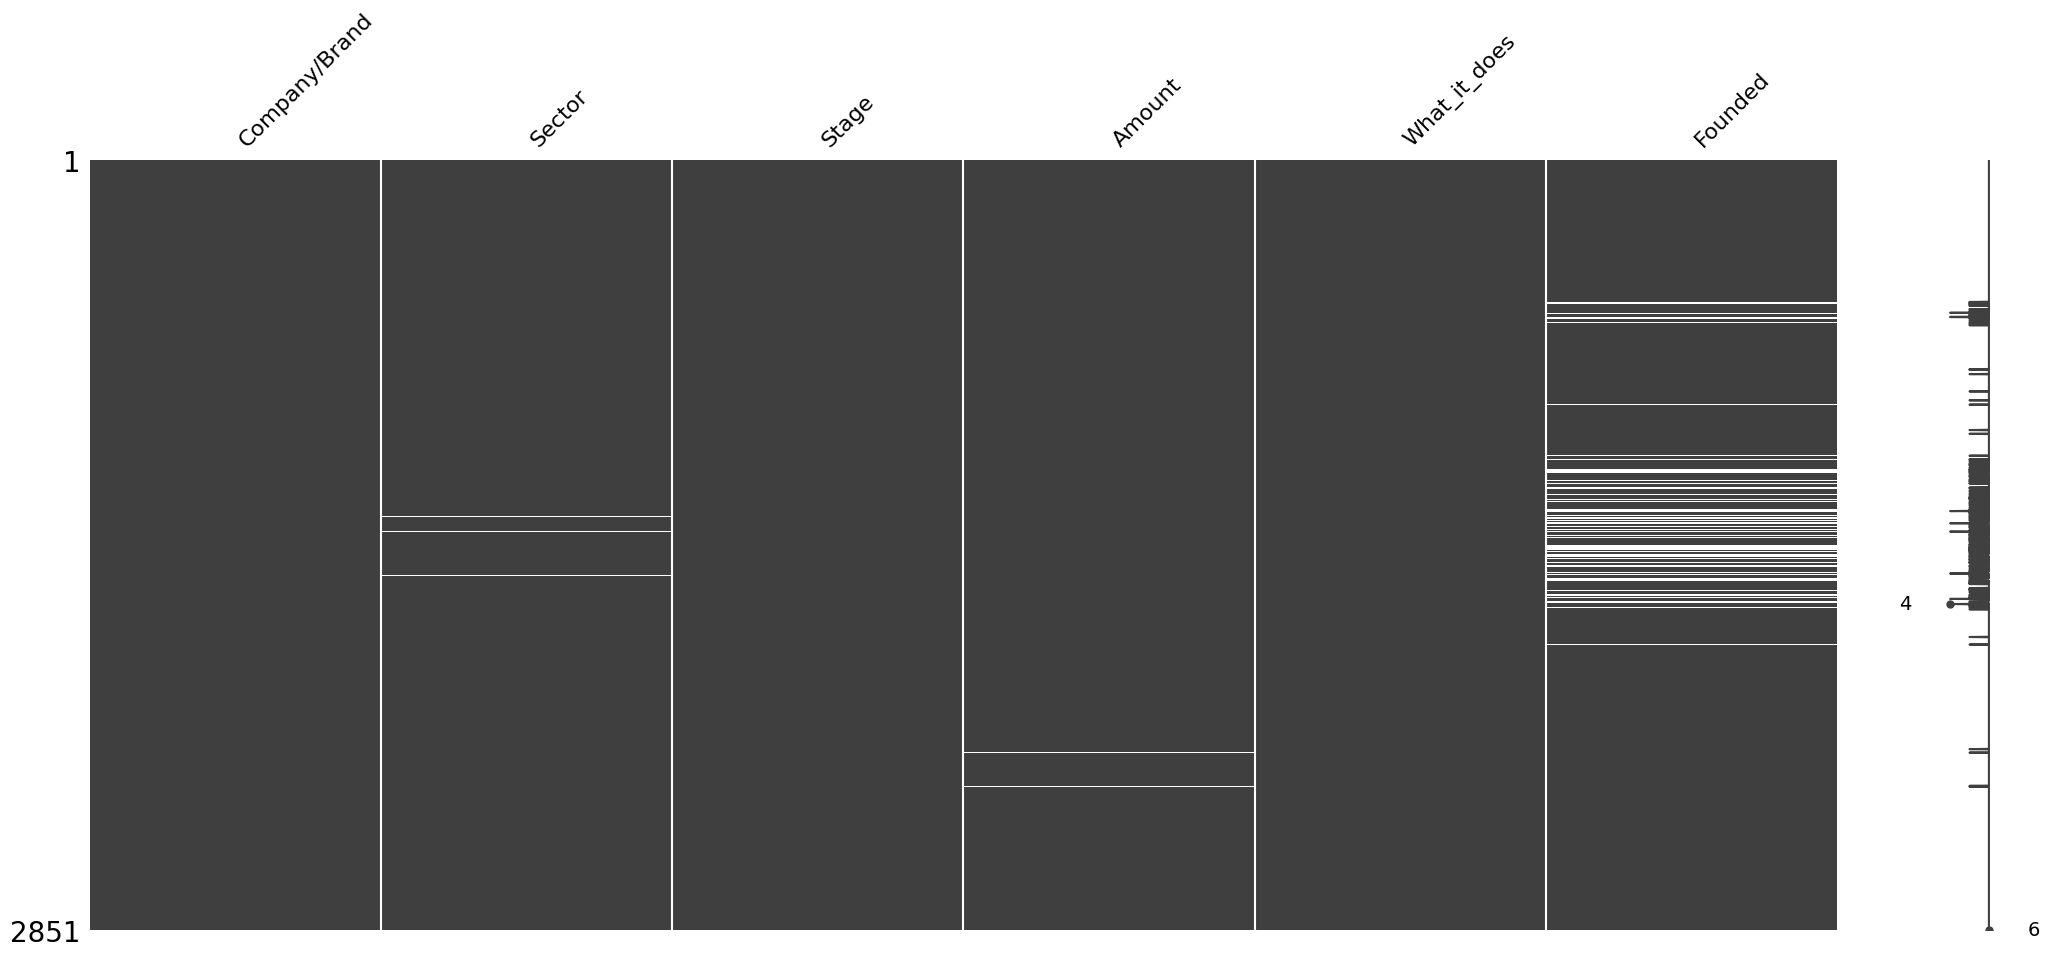

In [128]:
msno.matrix(master_df)

In [129]:
# Check for missing values
master_df.isnull().sum()

Company/Brand      0
Sector            18
Stage              0
Amount             7
What_it_does       0
Founded          241
dtype: int64

In [130]:
# Check for percentage of the missing values
round(master_df.isnull().sum() / len(master_df) * 100, 2)

Company/Brand    0.00
Sector           0.63
Stage            0.00
Amount           0.25
What_it_does     0.00
Founded          8.45
dtype: float64

In [131]:
# Filter all observations with at least NaN
rows_with_na = master_df[master_df.isnull().any(axis=1)]
rows_with_na.shape

(257, 6)

The code above reveals that, there are a total of 257 rows that contains at least a missing value in one of it feature field. 

The total percentage of missing values will be computed and examined and dropped where necessary.

In [132]:
# percentage of observations with NaN
f'{round(rows_with_na.shape[0] / master_df.shape[0]*100, 2)}%'

'9.01%'

- The Sector is missing about 0.63% of data points

- Founded (Year) is missing about 8.45% of data points

- The Whole dataset is missing about 9.01% observations

Since the whole dataset is missing only 9% of observations and will not have impact on the analysis, they will be dropped 

In [133]:
# Drop all observations with NaN 
master_df.dropna(inplace=True)

<Axes: >

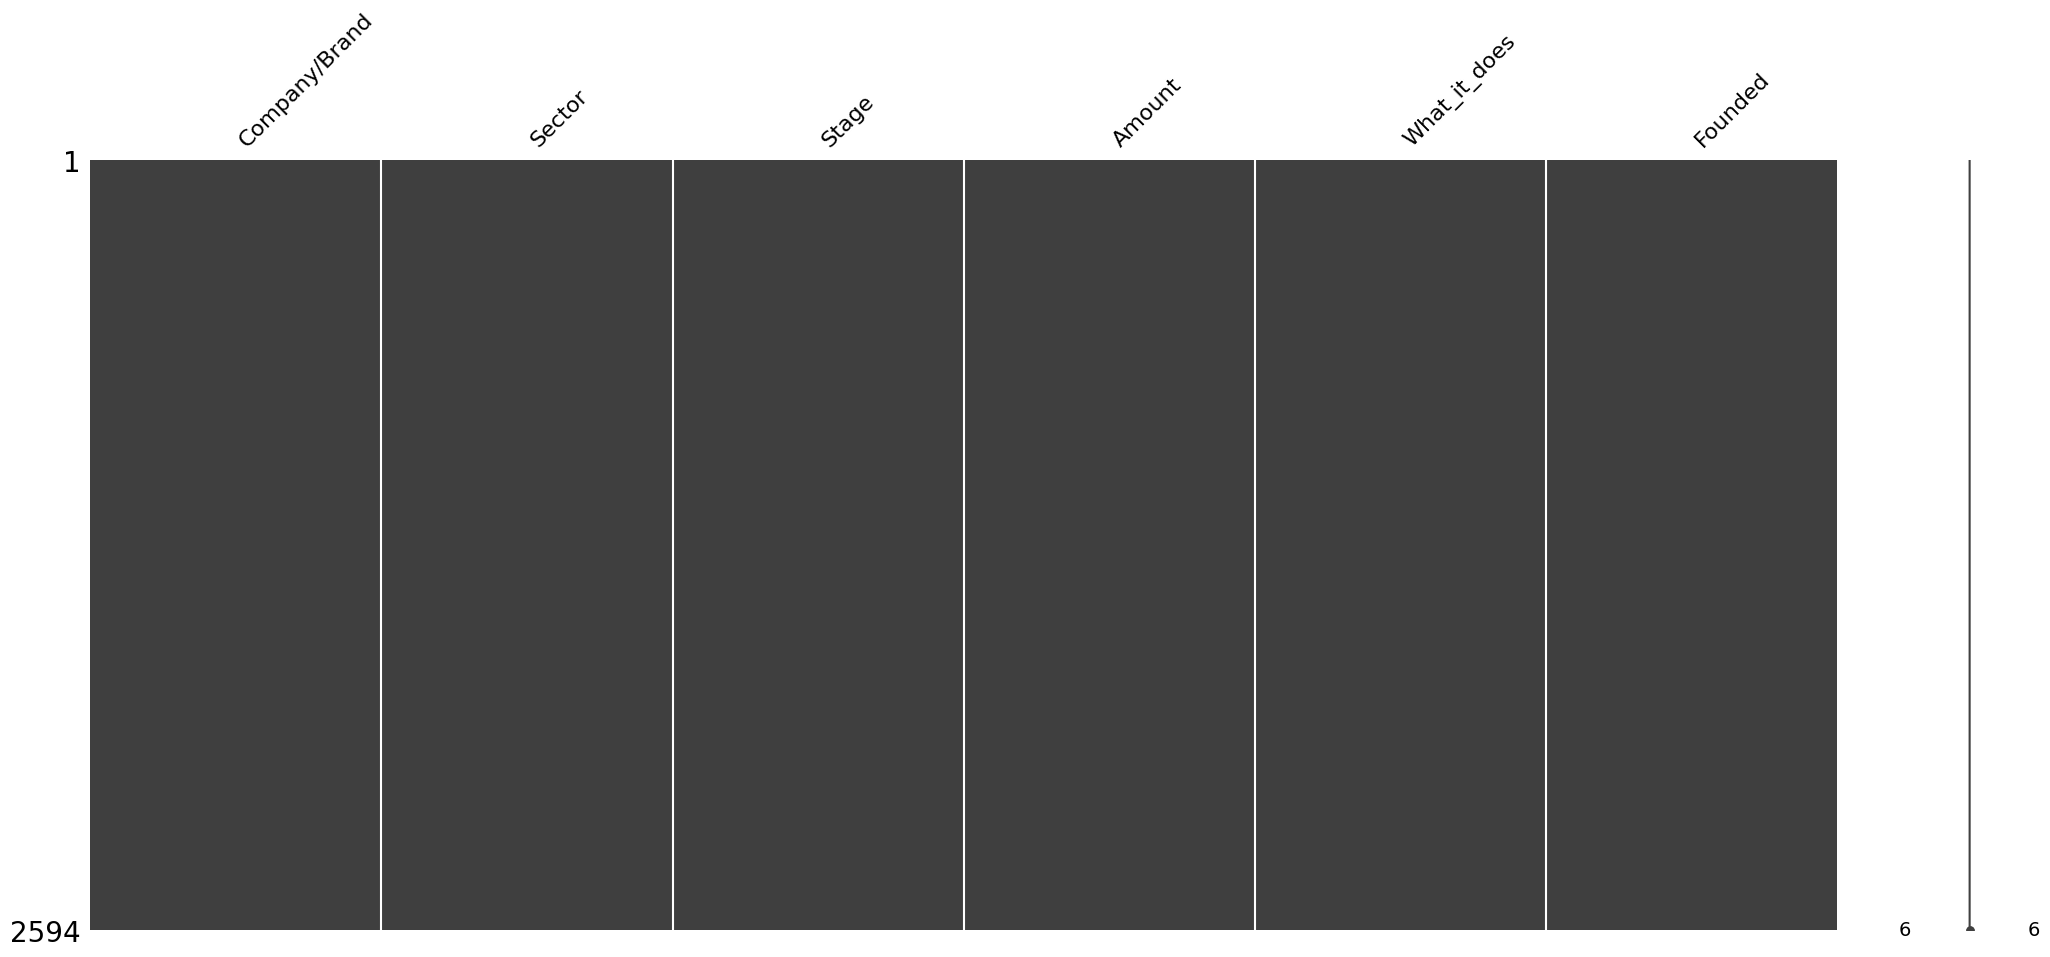

In [134]:
# Confirm changes
msno.matrix(master_df)

To enable deep-level analysis, the data will be further processed by categorizing the `stages column` into high-level funding stages based on the stages listed on the Indian Startup Ecosystem website. A new column, `stage of funding`, will be created to facilitate the groupings.


SOURCE: https://www.startupindia.gov.in/



| Stage of Funding          | Stage mapping                                                                                                                                                               |
|-----------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Ideation        | Pre-Seed funding                                                                                                                                                       |
| Validation      | Mid series, Seed Round & Series A, Seed funding                                                                                                                       |
| Early Traction  | Series A                                                                                                                                                               |
| Scaling         | Series B, Series C, Series D, Series E, Series F, Series G, Series H, Series I                                                                                          |
| Exit Option     | Post-IPO Debt, Post-IPO Equity, Secondary Market                                                                                                                       |
| Other           | Private Equity, Corporate Round, Undisclosed, Non-equity Assistance, Debt, Bridge, Edge                                                                               |


In [135]:
# Define the conditions and corresponding values for the new column

conditions = [
    master_df['Stage'].isin(['Pre-Seed funding']),
    master_df['Stage'].isin(['Mid series', 'Seed Round & Series A', 'Seed funding']),
    master_df['Stage'].isin(['Series A']),
    master_df['Stage'].isin(['Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G', 'Series H', 'Series I']),
    master_df['Stage'].isin(['Post-IPO Debt', 'Post-IPO Equity', 'Secondary Market']),
    master_df['Stage'].isin(['Private Equity', 'Corporate Round', 'Undisclosed', 'Non-equity Assistance', 'Debt', 'Bridge', 'Edge'])
]

values = [
    'Ideation',
    'Validation',
    'Early Traction',
    'Scaling',
    'Exit Option',
    'Other'
]

# Use np.select to assign the corresponding value based on the conditions
master_df['Stage_of_funding'] = np.select(conditions, values, default=None)

In [136]:
# Confirm changes
master_df['Stage_of_funding'].value_counts()

Stage_of_funding
Early Traction    1398
Validation         689
Scaling            347
Ideation            76
Other               76
Exit Option          8
Name: count, dtype: int64

Based on the statistics above, these numbers indicate the distribution of companies across different stages of funding:

- Early Traction: 1398 companies are in this stage.
- Validation: 689 companies are in this stage.
- Scaling: 347 companies are in this stage.
- Ideation: 76 companies are in this stage.
- Other: 76 companies are in this stage.
- Exit Option: 8 companies are in this stage.

In [137]:
# Save the master_df to a cv file for reproducibility
master_df.to_csv('clean_dataset.csv', index=False)

In [138]:
# Categorize the stage of funding for easy analysis
master_df['Stage_of_funding'] = master_df['Stage_of_funding'].astype('category')

In [139]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2594 entries, 0 to 2850
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Company/Brand     2594 non-null   object  
 1   Sector            2594 non-null   object  
 2   Stage             2594 non-null   object  
 3   Amount            2594 non-null   float64 
 4   What_it_does      2594 non-null   object  
 5   Founded           2594 non-null   Float64 
 6   Stage_of_funding  2594 non-null   category
dtypes: Float64(1), category(1), float64(1), object(4)
memory usage: 147.1+ KB


The merged dataset contains 2594 entries with 7 columns. 

The columns include 'Company/Brand,' 'Sector,' 'Stage,' 'Amount,' 'What_it_does,' 'Founded,' and 'Stage_of_funding.' 

The `Amount` and `Founded` columns have non-null values, while the `Stage_of_funding` column is of categorical data type.

# HYPOTHESIS TESTING

### ANOVA TEST RESULT

In [140]:
# Perform the OLS regression
model = ols('Amount ~ C(Stage_of_funding)', data=master_df).fit()

# Perform the ANOVA test
anova_table = sm.stats.anova_lm(model)

# Output the results
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Stage_of_funding),5.0,2.884006e+20,5.768012e+19,5.506353,0.000048
Residual,2588.0,2.710980e+22,1.047519e+19,NaN,NaN


| Term     | Description                                                                                                                                             |
|----------|---------------------------------------------------------------------------------------------------------------------------------------------------------|
| df       | Degrees of freedom associated with each variable or factor. In this case, the "Factor" row corresponds to the degrees of freedom for the `stage of funding` variable (5) indicating 5 categories, and the "Residual" row corresponds to the degrees of freedom for the residual or error term (`2588`). |
| sum_sq   | Sum of squares associated with each variable or factor. For the `stage of funding` variable, the sum of squares is `288400590791061897216.00`, and for the residual, the sum of squares is `27109801225550987001856.00`.                                             |
| mean_sq  | Mean sum of squares associated with each variable or factor. For the `stage of funding` variable, the mean sum of squares is `57680118158212382720.00`, and for the residual, the mean sum of squares is `10475193672933148672.00`.                          |
| F        | F-statistic, which measures the ratio of between-group variability to within-group variability. In this case, the F-statistic for the `stage of funding` variable is `5.51`.                                      |
| PR(>F)   | P-value associated with the F-statistic, indicating the probability of observing the F-statistic or a more extreme value under the null hypothesis. In this case, the p-value is `0.00`.                                 |



Based on the given table, since the p-value is less than the significance level `(0.05)`, we can conclude that the stage of funding has a statistically significant impact on the amount of funding received by startups. Therefore, we can reject the null hypothesis that the round of funding (Stage_of_funding) does not have a significant impact on the amount of funds raised (Amount) by Indian startups.


This implies that the amount of funding received by startups at one stage of funding is statistically different from the amount received in a different stage of funding.

# QUESTION ONE

##### HOW DOES THE DISTRIBUTION OF FUNDING AMOUNTS VARY ACROSS DIFFERENT STAGES OF FUNDING? ARE THERE ANY OUTLIERS IN THE FUNDING AMOUNT WITHIN EACH STAGE?

In [141]:
# Create a boxplot
fig = px.box(master_df, x="Stage_of_funding", y="Amount", color="Stage_of_funding")
fig.update_layout(title="Distribution of Funding Amounts across Different Stages of Funding",
                  xaxis_title="Stage of Funding",
                  yaxis_title="Funding Amount (Log Scale)",
                   yaxis_type="log") # Set the y-axis scale to logarithmic
fig.show()

In [142]:
import plotly.graph_objects as go

# Create a violin plot
fig = go.Figure()
for stage in master_df['Stage_of_funding'].unique():
    fig.add_trace(go.Violin(x=master_df['Stage_of_funding'][master_df['Stage_of_funding'] == stage],
                            y=master_df['Amount'][master_df['Stage_of_funding'] == stage],
                            name=stage,
                            box_visible=True,
                            meanline_visible=True,
                            ))

fig.update_layout(title="Distribution of Funding Amounts across Different Stages of Funding",
                  xaxis_title="Stage of Funding",
                  yaxis_title="Funding Amount (Log Scale)",
                  yaxis_type="log")  # Set the y-axis scale to logarithmic
fig.show()


The box plot and violin plot depict the funding amount distribution across different stages of funding based on the data. 

For each stage below is the observation:

1. Early Traction has a median funding amount of 3,450,000, ranging from 877 to 70,000,000.


2. Exit Option shows a concentrated distribution around 71,629,435, with values ranging from 16,517,739 to 224,992,100.

3. Ideation exhibits a narrow distribution, with most data points below 500,000, and a median funding amount of 325,000.
4. Other displays a wide funding range, with a median funding amount of 5,020,000 and values from 1,461 to 150,000,000,000.
5. Scaling demonstrates a moderate concentration around 30,000,000, ranging from 410,000 to 1,000,000,000.
6. Validation shows a narrow distribution with a significant concentration around 730,873, and values ranging from 1,461 to 140,000,000.

Both plots reveal variations in funding amounts among different stages and potential outliers. The violin plot highlights the density of funding amounts at various points, providing a comprehensive view of funding distribution across stages.

# QUESTION TWO

##### WHAT HAS BEEN THE TREND OF AVERAGE INVESTMENT AMOUNT OVER THE YEARS (2018–2021)?

In [143]:
# Average investment amounts by year
investment_trend = master_df.groupby('Founded')['Amount'].mean().reset_index()

# Filter the DataFrame to include only startups that were founded in 2018 or later
investment_trend = investment_trend[investment_trend['Founded'] >= 2018]

# Create a line plot
fig = px.line(investment_trend, x='Founded', y='Amount', title='Average Investment Trend Over the Years')
fig.update_layout(xaxis_title='Founded (Year)', yaxis_title='Average Investment Amount (Log Scale)', xaxis_tickmode='linear', yaxis_type='log')
fig.show()

In [144]:
# Aggregate investment amounts by year
investment_trend = master_df.groupby('Founded')['Amount'].sum().reset_index()

# Filter the DataFrame to include only startups that were founded in 2018 or later
investment_trend = investment_trend[investment_trend['Founded'] >= 2018]

# Create a bar chart
fig = px.bar(investment_trend, x='Founded', y='Amount', title='Total Investment Trend Over the Years')
fig.update_layout(xaxis_title='Year Founded', yaxis_title='Total Investment Amount (Log Scale)', yaxis_type='log', xaxis_tickmode='linear',)
fig.show()

From the Line Chart and the Bar Graph above, these points demonstrate the contrasting trends in average investment amounts and total investment amounts across all startups over the years. The line graph reflects the fluctuations in average investments, showcasing a significant increase in 2018, followed by a decline in 2019 and 2020, and an increase in 2021. 

On the other hand, the bar graph shows the total investment amounts, indicating a substantial investment activity in 2018, followed by a decline in 2019 and 2020, and a relatively stable level in 2021.

# QUESTION THREE

##### WHAT HAS ACCOUNTED FOR THE DISTRIBUTION OF STAGES OF FUNDING IN A YEAR-BY-YEAR CASE?

In [145]:
# Filter the data for startups founded in 2018 and later
filtered_df = master_df[master_df['Founded'] >= 2018]

# Group the filtered data by year and stage of funding and calculate the count
grouped_data = filtered_df.groupby(['Founded', 'Stage_of_funding']).size().reset_index(name='Count')

# Create a grouped bar plot
fig = px.bar(grouped_data, x='Founded', y='Count', color='Stage_of_funding', barmode='group',
             title='Distribution of Stages of Funding by Year')
fig.update_layout(xaxis_title='Founded (Year)', yaxis_title='Total', yaxis_type='log')
fig.show()

The funding trend depicted in the graph reveals interesting insights. In 2018, a noticeable decrease in funding amounts can be attributed to many startups in the Exit Option and Other stages not receiving further funding, as they were already at an advanced stage of development. These stages generally require substantial funding. Additionally, the declining funding in 2019 can be linked to a decrease in the number of Early Traction and Validation startups receiving funding.

In 2020, there was a shift in investor focus, leading to increased funding for startups in the Ideation and Validation stages. However, funding for startups in the Early Traction and Scaling stages reduced, possibly as investors sought to support fresh and innovative ideas in the economy.

By 2021, funding for startups across all stages further declined, and no startups in the Exit Option or Other stages received funding. This trend suggests a cautious investment climate during that period. Overall, the data highlights the changing dynamics of funding patterns among different startup stages and provides valuable insights into investor preferences and startup growth opportunities.

# QUESTION FOUR

##### WHAT STAGE OF STARTUPS RECEIVED THE HIGHEST FUNDING INVESTMENT AND WHY?

In [146]:
# Filter the data for startups founded in 2018 and above
filtered_df = master_df[master_df['Founded'] >= 2018]

# Calculate the total funding amount for each stage
total_funding_by_stage = filtered_df.groupby('Stage_of_funding')['Amount'].sum().reset_index()

# Sort the stages by total funding amount in descending order
sorted_stages = total_funding_by_stage.sort_values(by='Amount', ascending=False)

# Get the stage with the highest total funding
stage_with_most_funding = sorted_stages.iloc[0]['Stage_of_funding']
total_funding = sorted_stages.iloc[0]['Amount']

# Create a bar plot to visualize the total funding amounts by stage
fig = px.bar(sorted_stages, x='Stage_of_funding', y='Amount',
             title='Total Funding Amount by Stage of Funding')
fig.update_layout(xaxis_title='Stage of Funding', yaxis_title='Total Funding Amount', yaxis_type='log')
fig.show()

print("The stage of funding that has received the most funding throughout the entire period is:", stage_with_most_funding)
print("Total Funding Amount:", total_funding)

The stage of funding that has received the most funding throughout the entire period is: Other
Total Funding Amount: 152746021029.0


From the Graph above, Over the years, a majority of the startups that have received funding fall under the "Other" category, which includes Private Equity, Corporate Round, Undisclosed, Non-equity Assistance, Debt, Bridge, and Edge. These types of funding are often associated with more mature startups. As the startup ecosystem has matured, investors have become more comfortable investing in later-stage startups that are closer to profitability.


On the other hand, early-stage startups categorized as "Ideation" have received less attention and funding. This could be attributed to the global economic slowdown during the period from 2018 to 2021. Economic downturns can make it more challenging for early-stage startups to raise capital. These startups are typically considered riskier, and investors tend to be more risk-averse in a recessionary environment.


These observations suggest that the funding landscape has favored more mature startups in recent years, while early-stage startups face additional challenges due to the economic conditions. It highlights the importance for early-stage startups to navigate the funding landscape effectively and demonstrate their potential for growth and profitability to attract investors even during challenging times.

# QUESTION FIVE

##### DOES THE SECTOR OF STARTUPS HAVE AN INFLUENCE ON THE STAGE OF FUNDING THEY RECEIVE AND WHY?

In [147]:
# Group the data by sector and stage of funding and calculate the count
grouped_data = master_df.groupby(['Sector', 'Stage_of_funding']).size().reset_index(name='Count')

# Calculate the count of startups for each sector
sector_counts = grouped_data['Sector'].value_counts()

# Get the top 5 sectors
top_5_sectors = sector_counts.head(5)

# Filter the grouped data to include only the top 5 sectors
filtered_data = grouped_data[grouped_data['Sector'].isin(top_5_sectors.index)]

# Save as csv for reproducibility
filtered_data.to_csv('sector_effect.csv', index=False)

# Create a stacked bar plot
fig = px.bar(filtered_data, x='Sector', y='Count', color='Stage_of_funding', barmode='stack',
             title='Distribution of Stages of Funding by Sector (Top 5 Sectors)')
fig.update_layout(xaxis_title='Sector', yaxis_title='Total')
fig.show()

Based on the above graph, it is evident that the hospitality sector has the highest count in the stages of funding, namely early traction, validation, and scaling, within the Indian startup ecosystem. This pattern can be explained by several factors, including:

**Market Demand:** The hospitality sector, encompassing industries such as hotels, restaurants, and travel, experiences significant demand due to India's growing population, rising disposable incomes, and increasing tourism. The demand for hospitality services creates a favorable environment for startups in this sector, leading to a higher count of funding in early traction, validation, and scaling stages.

**Potential Growth:** The hospitality sector in India offers substantial growth potential, driven by factors such as an expanding tourism industry, and the government's focus on promoting travel and hospitality. Investors recognize the growth opportunities in this sector and are more inclined to fund startups operating in hospitality, thereby contributing to the higher count of funding in the early stages.

**Innovation and Disruption:** Startups in the hospitality sector often introduce innovative solutions and disruptive business models to address emerging market needs. These innovations can range from online booking platforms, sharing economy concepts, technology-driven solutions for customer experience, and sustainable practices. The ability of hospitality startups to innovate and disrupt traditional industry practices attracts attention from investors, leading to increased funding in the early traction, validation, and scaling stages.

# RECOMMENDATIONS


1. Investors should consider allocating funds to startups in different stages of funding, as the analysis reveals variations in the median funding amounts across stages. For instance, startups in the "Exit Option" stage have a median funding of $71,629,435, while startups in the "Ideation" stage have a median funding of $325,000. This diversification can help balance potential risks and returns.

2. Startups in the "Other" category, which includes mature stages like Private Equity and Corporate rounds, received the highest count of funding over the years (781 startups). Investing in this category may offer stable investment opportunities, considering its wide distribution of funding amounts ranging from $1,461 to $150,000,000,000.

3. Despite the relatively high count of startups in the "Early Traction" stage (1398 startups), its median funding amount is $3,450,000, with potential outliers reaching as high as $70,000,000. Investors should carefully assess these outliers to understand their potential for high returns or the risks associated with large funding requirements.

4. The "Ideation" stage has the lowest median funding amount of $325,000, indicating a potential investment opportunity for venture capitalists seeking to support early-stage innovative ideas. Investing in this stage could lead to significant returns if promising startups scale successfully.

5. The analysis also reveals a decline in average investment amounts from 2018 to 2019 and a subsequent increase in 2021. Investors should be cautious of economic trends and consider the fluctuating investment climate when making funding decisions. Thorough due diligence and an assessment of startups' growth potential are essential to making well-informed investment choices.


# POWER BI DEPLOYMENT AND EMBEDDING

In [148]:
# Authenticate to Power Bi
auth = DeviceCodeLoginAuthentication()

token_with_device_code = auth.get_access_token()

Performing device flow authentication. Please follow the instructions below.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code CFK4KN3N8 to authenticate.

Device flow authentication successfully completed.
You are now logged in .

The result should be passed only to trusted code in your notebook.


In [149]:
# Generate the report using the report id
report_id = 'fc144814-5871-47b5-b59b-8d11075586b2'

report = Report(report_id=report_id, auth=auth)

In [150]:
# Define event handlers for report loaded and report rendered

# Report is loaded
def loaded_callback(event):
    print('Report is Loaded')

# Report is Rendered
def rendered_callback(event):
    print('Report is Rendered')

# Attach the event handler
report.on('loaded', loaded_callback)
report.on('rendered', rendered_callback)

In [151]:
# render report
report

Report()

# ALTERNATIVE EMBEDDING OF DASHBOARD USING HTML IFRAME TAG

Due to technical limitations with embedding the Power Bi dashboard directly in the notebook regarding how to get the group_id (Workspace ID) which was not showing in the deployed link, the group opted to use the HTML iframe tag to embed the dashboard using the public URL. Although there are some syntax errors in the cell, this solution works, allowing access to the dashboard within our notebook. Furthermore, it enables seamless interaction with the dashboard, providing a smooth and interactive experience.

In [152]:
<iframe title="indian startup ecosystem" width="90%" height="600" src="https://app.powerbi.com/view?r=eyJrIjoiYjI3M2Y3ZDAtZmEwOC00MzJjLThiZDEtYTU2NzcyNTJkZTgxIiwidCI6IjQ0ODdiNTJmLWYxMTgtNDgzMC1iNDlkLTNjMjk4Y2I3MTA3NSJ9" frameborder="0" allowFullScreen="true"></iframe>

SyntaxError: invalid syntax (372926205.py, line 1)